## 1. Statistical Overview and Visualization

### A. Import Python libraries

In [1]:
import klib
import plotly
import pandas as pd
import sweetviz as sv
from pylab import rcParams
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning, )
%matplotlib inline

print(klib.__version__)
print(plotly.__version__)
print(pd.__version__)
print(sv.__version__)
print(sns.__version__)

1.1.2
5.22.0
2.1.4
2.3.1
0.12.2


### B. Set City Name and Import City Data

In [2]:
# set city name
city_data = "1_goyang_city.xlsx"
CITY_NAME_Eng = "GoYang-City"

In [3]:
# Read excel file using pandas
df = pd.read_excel(open(f"../../data/{city_data}", 'rb'), sheet_name="training", header=4, index_col=0)
# Remove unnecessary columns for this analysis
df = df.iloc[2:]
# Change Date Format and Set Date as index
df.index = pd.to_datetime(df.index.str.strip(), format='%Y-%m')
df.index.name = "date"
# Change data format from "Object" to "Float"
df["water_supply"] = df.water_supply.astype(float)
df["Total_Population"] = df.Total_Population.astype(float)
# Delete unnecessary columns 
df.drop(columns=df.columns[19:21], inplace=True)
df.drop(columns=df.columns[22:23], inplace=True)
# Select clean data
df = df.loc["2010-01-01":]
df

,water_supply,Total_Population,Households,Population_per_Households,Male_Population,Female_Population,Male_Female_Ratio,Population_aging_Ratio,Power_usage,Num_of_Business,...,personal_expense,benefits_vs_personal_expense,employment_ratio,employment_insurance_ratio,Average_Temp,Monthly_Rainfall,Average_Relative_Humadity,Ground_Temp,Average_Wind,Average_Pressure
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,282265.709677,939497.0,353741.0,2.655889,463878.0,475619.0,0.975314,0.088,434436000.0,20326.0,...,104371555.0,0.191,99001.0,0.105377,-4.5,29.3,0.65,-1.2,2.3,1013.6
2010-02-01,273685.892857,940639.0,354266.0,2.655177,464518.0,476121.0,0.975630,0.088,418156000.0,20685.0,...,104371555.0,0.191,99893.0,0.106197,1.4,55.3,0.59,1.4,2.4,1010.7
2010-03-01,269918.193548,940982.0,354003.0,2.658119,464740.0,476242.0,0.975848,0.088,346653000.0,20809.0,...,104371555.0,0.191,99678.0,0.105930,4.3,82.5,0.59,5.0,2.9,1009.6
2010-04-01,274462.700000,941737.0,354192.0,2.658832,465148.0,476589.0,0.975994,0.088,356701000.0,21857.0,...,104371555.0,0.191,101594.0,0.107879,9.5,62.8,0.54,10.8,2.9,1007.4
2010-05-01,288537.806452,941724.0,354157.0,2.659058,465110.0,476614.0,0.975863,0.089,313793000.0,21739.0,...,104371555.0,0.191,102073.0,0.108390,17.2,124.0,0.62,18.7,2.6,1000.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,354382.451613,1080896.0,454793.0,2.376677,528972.0,551924.0,0.958415,0.140,487867544.0,46416.0,...,218316665.0,0.293,171845.0,0.158984,25.9,211.2,0.74,28.2,2.1,998.6
2021-09-01,343537.800000,1080787.0,455501.0,2.372743,528911.0,551876.0,0.958387,0.141,401433572.0,45514.0,...,218316665.0,0.293,172771.0,0.159857,22.6,131.0,0.71,24.6,2.3,1003.4
2021-10-01,340126.806452,1080240.0,455845.0,2.369753,528683.0,551557.0,0.958528,0.142,358286760.0,45839.0,...,218316665.0,0.293,173486.0,0.160599,15.6,57.0,0.70,16.7,2.1,1011.0


### C. Check missing data

In [4]:
df_cleaned = klib.data_cleaning(df)
df_cleaned

Shape of cleaned data: (144, 25) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.01 MB (-33.33%)



,water_supply,total_population,households,population_per_households,male_population,female_population,male_female_ratio,population_aging_ratio,power_usage,num_of_business,...,personal_expense,benefits_vs_personal_expense,employment_ratio,employment_insurance_ratio,average_temp,monthly_rainfall,average_relative_humadity,ground_temp,average_wind,average_pressure
0,282265.709677,939497.0,353741.0,2.655890,463878.0,475619.0,0.975314,0.088,434436000.0,20326.0,...,104371555.0,0.191,99001.0,0.105377,-4.500000,29.299999,0.65,-1.200000,2.3,1013.599976
1,273685.892857,940639.0,354266.0,2.655177,464518.0,476121.0,0.975630,0.088,418156000.0,20685.0,...,104371555.0,0.191,99893.0,0.106197,1.400000,55.299999,0.59,1.400000,2.4,1010.700012
2,269918.193548,940982.0,354003.0,2.658119,464740.0,476242.0,0.975848,0.088,346653000.0,20809.0,...,104371555.0,0.191,99678.0,0.105930,4.300000,82.500000,0.59,5.000000,2.9,1009.599976
3,274462.700000,941737.0,354192.0,2.658832,465148.0,476589.0,0.975994,0.088,356701000.0,21857.0,...,104371555.0,0.191,101594.0,0.107879,9.500000,62.799999,0.54,10.800000,2.9,1007.400024
4,288537.806452,941724.0,354157.0,2.659058,465110.0,476614.0,0.975863,0.089,313793000.0,21739.0,...,104371555.0,0.191,102073.0,0.108390,17.200001,124.000000,0.62,18.700001,2.6,1000.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,354382.451613,1080896.0,454793.0,2.376677,528972.0,551924.0,0.958415,0.140,487867544.0,46416.0,...,218316665.0,0.293,171845.0,0.158984,25.900000,211.199997,0.74,28.200001,2.1,998.599976
140,343537.800000,1080787.0,455501.0,2.372743,528911.0,551876.0,0.958387,0.141,401433572.0,45514.0,...,218316665.0,0.293,172771.0,0.159857,22.600000,131.000000,0.71,24.600000,2.3,1003.400024
141,340126.806452,1080240.0,455845.0,2.369753,528683.0,551557.0,0.958528,0.142,358286760.0,45839.0,...,218316665.0,0.293,173486.0,0.160599,15.600000,57.000000,0.70,16.700001,2.1,1011.000000
142,335109.300000,1079722.0,456376.0,2.365861,528390.0,551332.0,0.958388,0.142,372991744.0,46076.0,...,218316665.0,0.293,173831.0,0.160996,8.200000,62.400002,0.68,7.900000,2.1,1009.099976


In [5]:
klib.missingval_plot(df, figsize=(15,15))

No missing values found in the dataset.


### D. Plot every related variables for water supply

[]

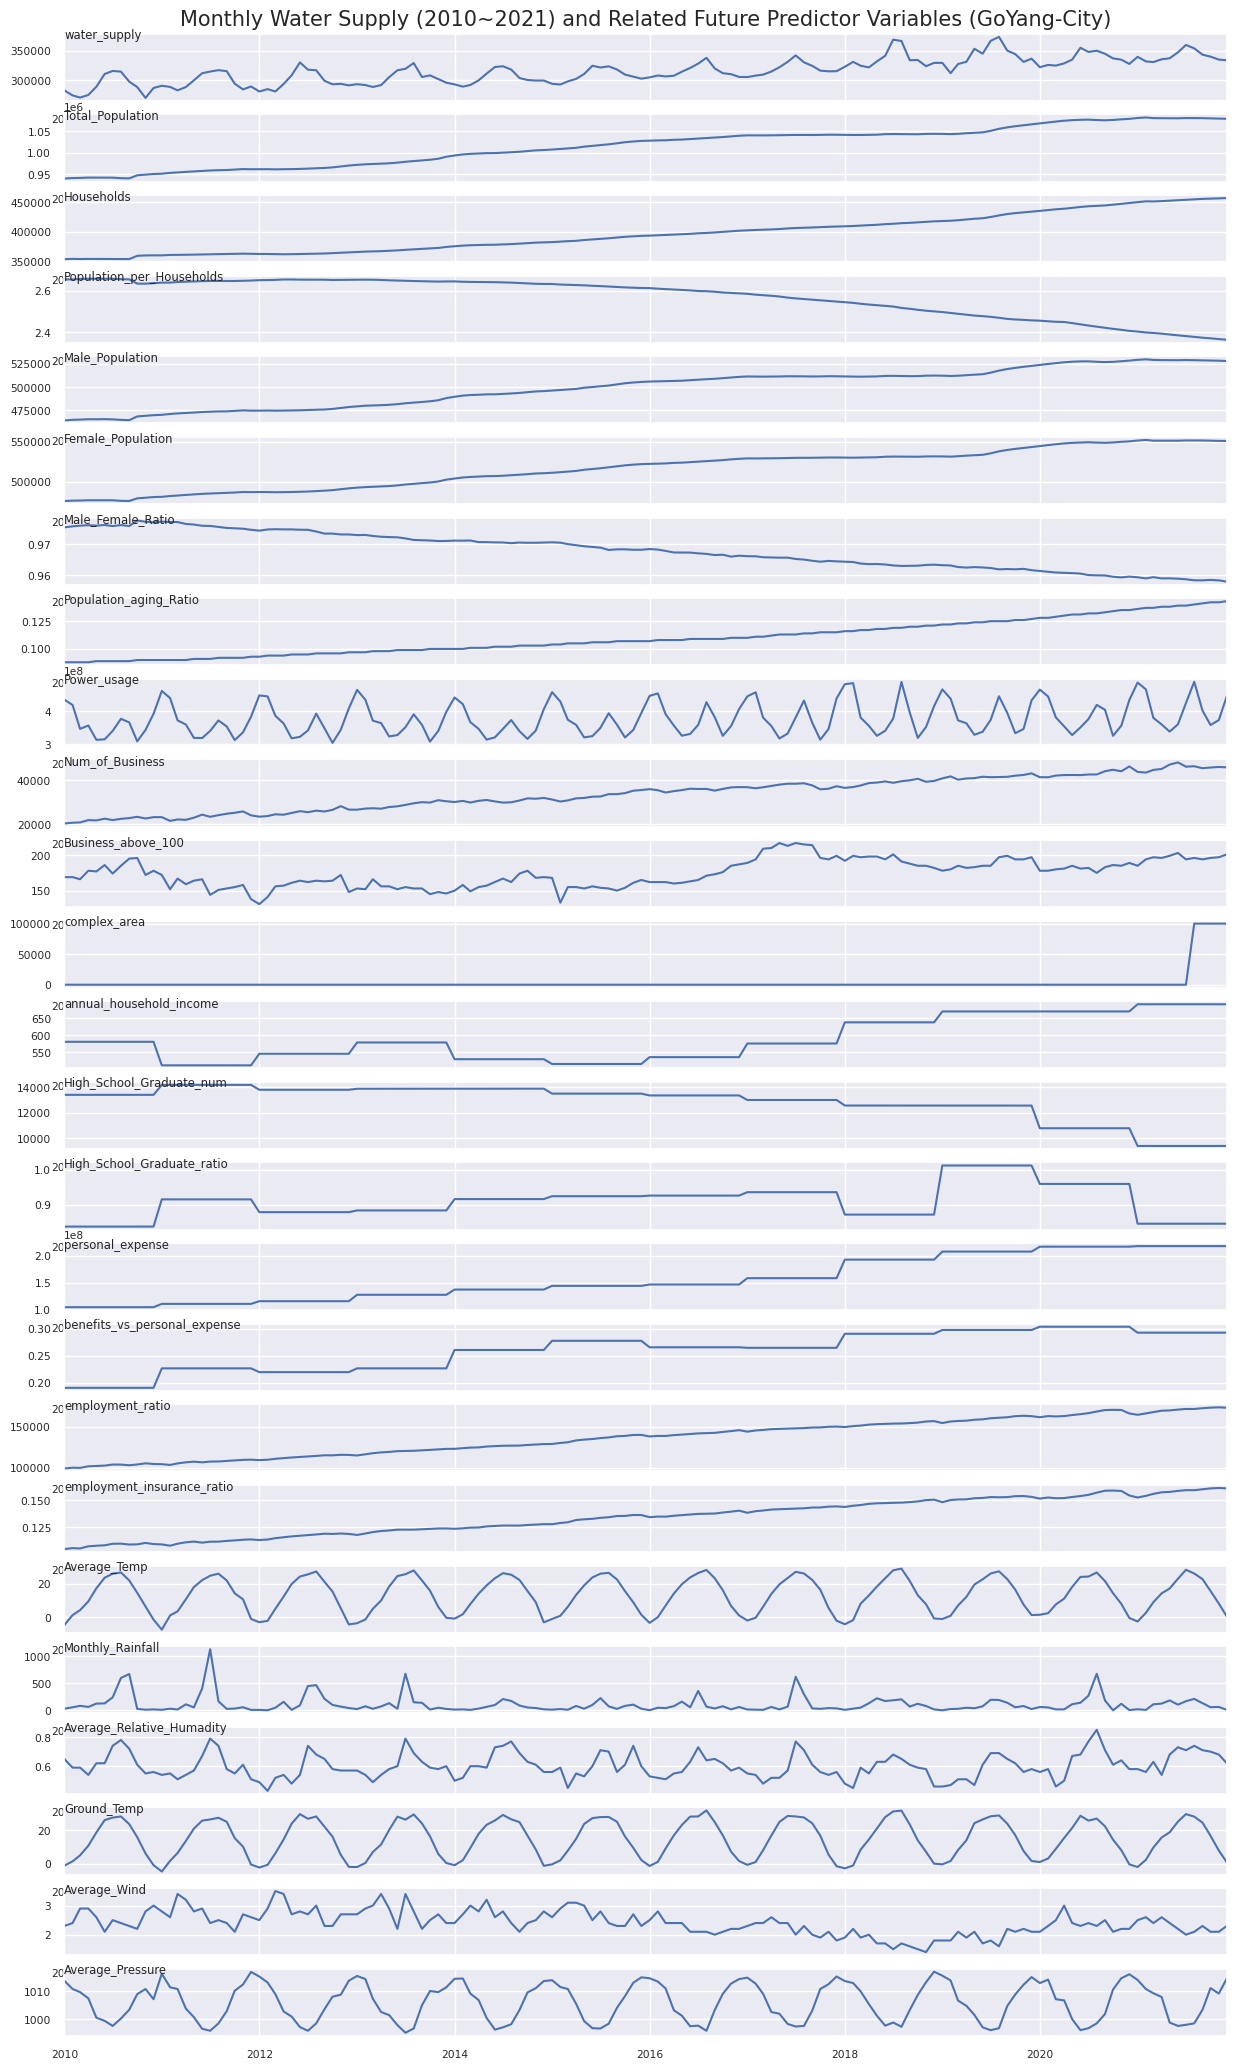

In [6]:
folder_name = "figures"
sns.set(font_scale = 0.7)
plt.rcParams['axes.unicode_minus'] = False
rcParams['figure.figsize'] = 15, 26
fig1 = plt.figure()
values = df.values
sns.set(font_scale = 0.7)
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    if group == 0:
        plt.title(f"Monthly Water Supply (2010~2021) and Related Future Predictor Variables ({CITY_NAME_Eng})", fontsize=15)
    plt.plot(df.index,  values[:, group])
    plt.title(df.columns[group], y=0.8, loc='left')
    plt.grid(True)
    plt.xlim([df.index[0], df.index[-1]])
    i += 1
filename = CITY_NAME_Eng+"_data_plot.png"
plt.savefig(filename, bbox_inches='tight')
plt.plot()

### E. Statistical Overview 

In [7]:
df.describe().applymap('{:,.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
water_supply,144.00,"315,919.89","22,030.69","269,321.20","299,132.35","315,432.08","331,146.34","374,070.52"
Total_Population,144.00,"1,015,428.56","44,957.08","939,497.00","971,155.75","1,027,891.50","1,043,967.75","1,082,420.00"
Households,144.00,"396,092.57","31,395.97","353,741.00","365,907.50","393,271.50","417,726.50","456,852.00"
Population_per_Households,144.00,2.57,0.09,2.36,2.50,2.61,2.65,2.66
Male_Population,144.00,"499,365.48","20,630.83","463,878.00","478,905.25","505,660.00","512,169.75","529,886.00"
Female_Population,144.00,"516,063.08","24,330.20","475,619.00","492,250.50","522,231.50","531,744.00","552,534.00"
Male_Female_Ratio,144.00,0.97,0.01,0.96,0.96,0.97,0.97,0.98
Population_aging_Ratio,144.00,0.11,0.02,0.09,0.10,0.11,0.12,0.14
Power_usage,144.00,"376,851,959.25","47,864,035.99","304,589,000.00","340,532,250.00","364,463,683.00","409,579,009.50","487,867,544.00"
Num_of_Business,144.00,"33,810.38","7,638.11","20,326.00","26,963.75","35,171.00","40,387.75","48,157.00"


In [8]:
df.describe().applymap('{:,.2f}'.format).T.to_csv(f"./{CITY_NAME_Eng}_statical_review.csv")

### F. Correlation

<Axes: title={'center': 'Feature-correlation (pearson)'}>

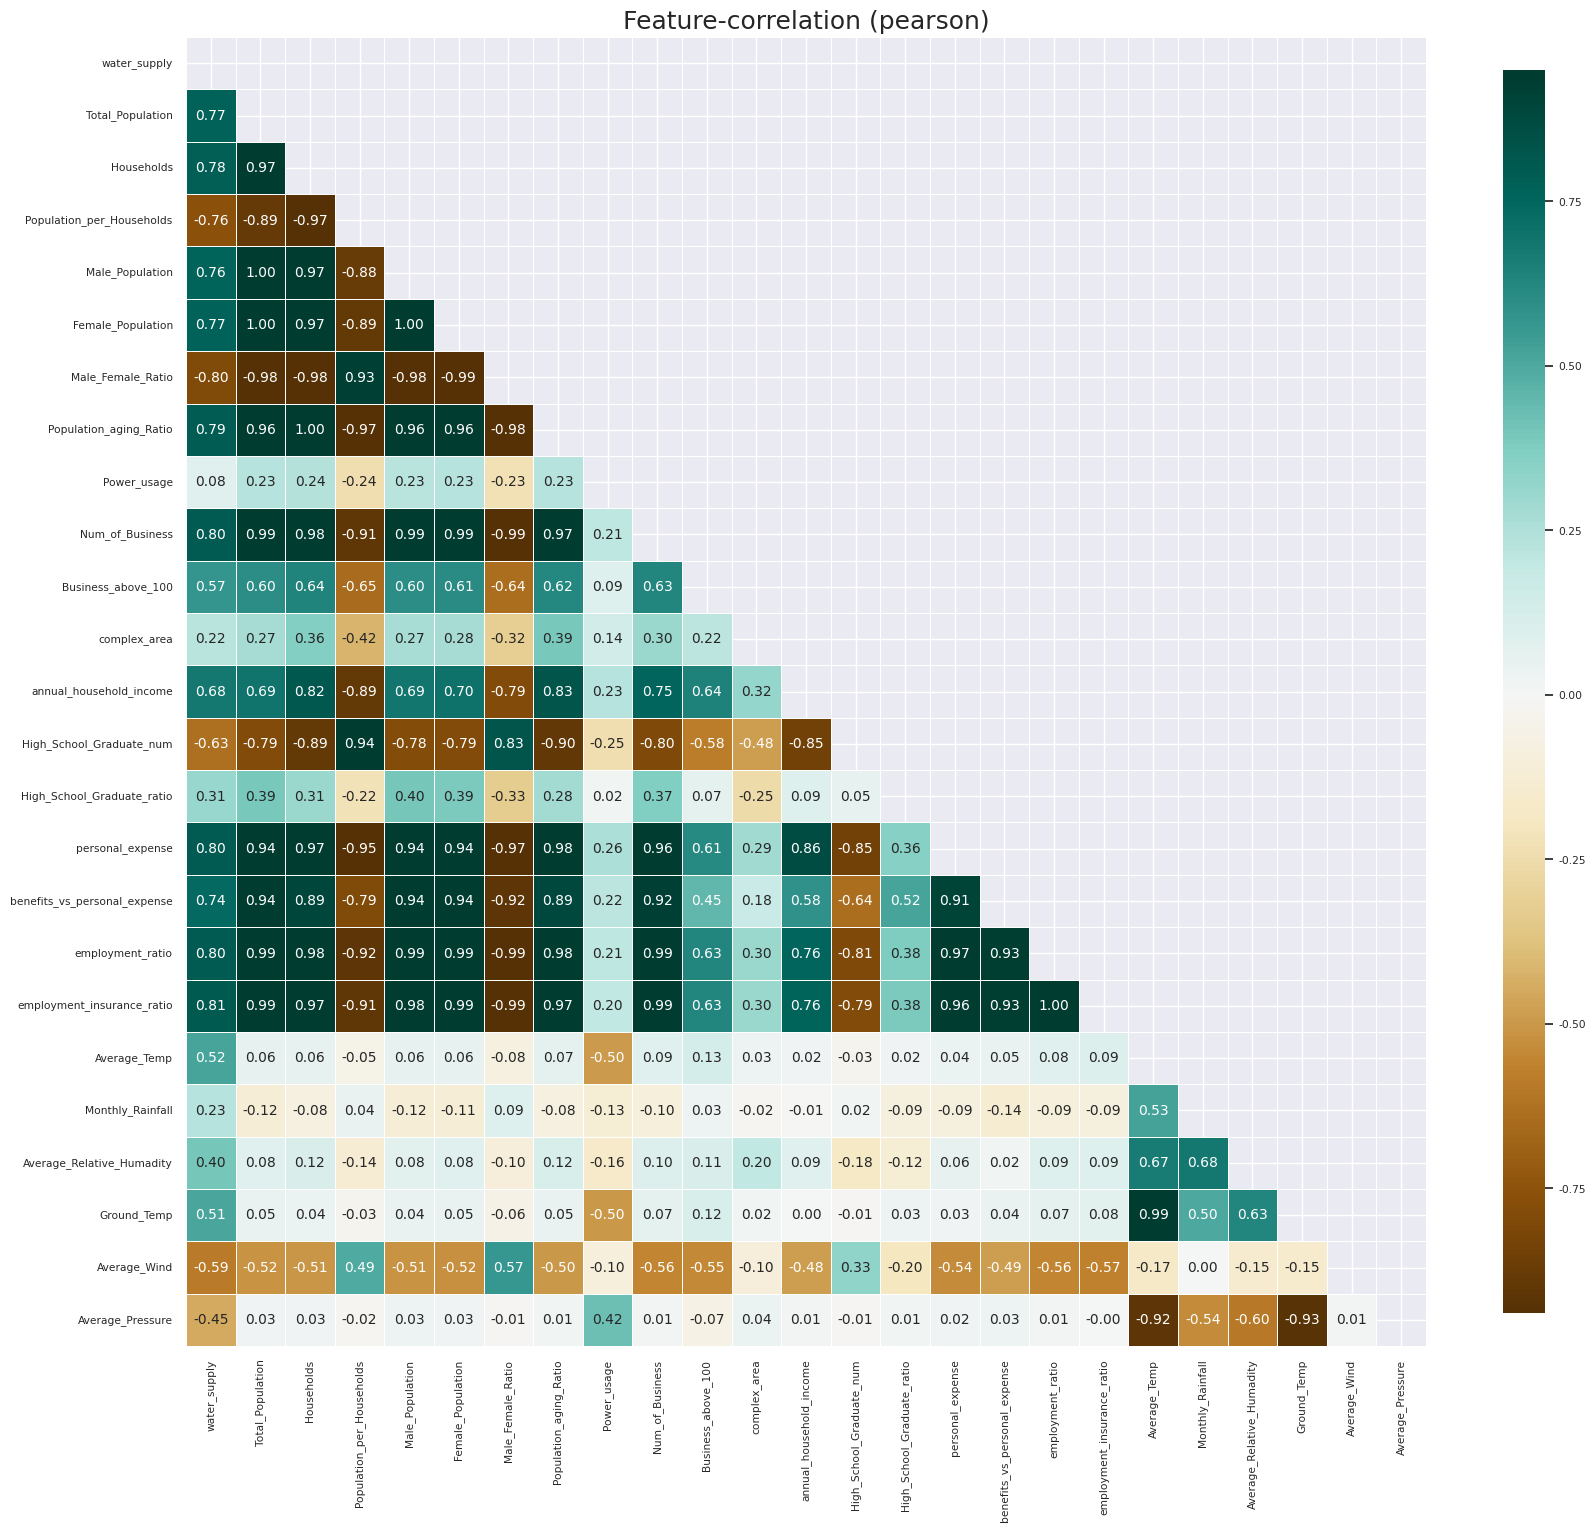

In [9]:
klib.corr_plot(df, annot=True, figsize=(20,17))

### G. Profiling Report using SweetViz Library

In [10]:
report = sv.analyze(df, pairwise_analysis='on')

                                             |          | [  0%]   00:00 -> (? left)


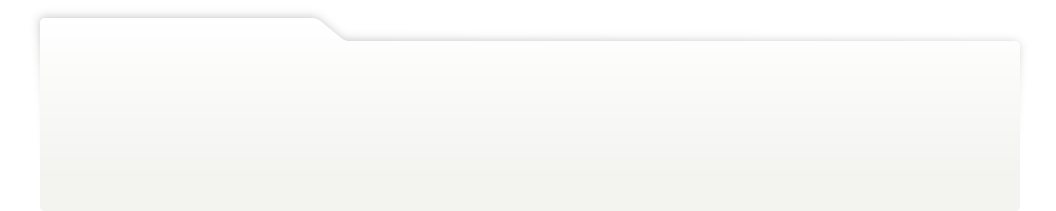
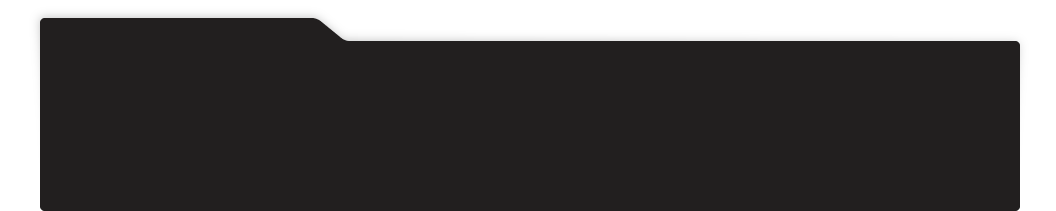
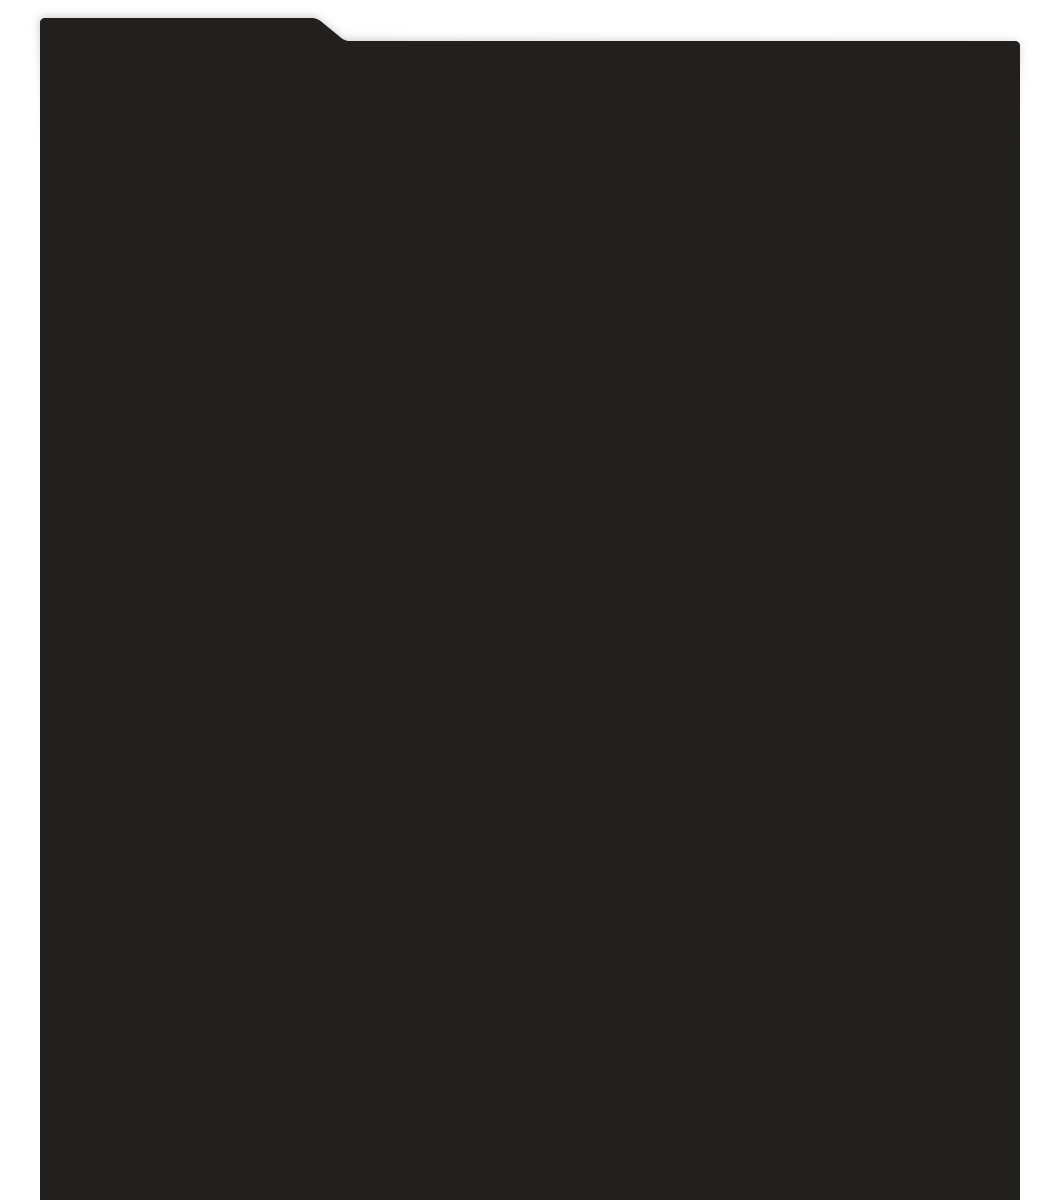
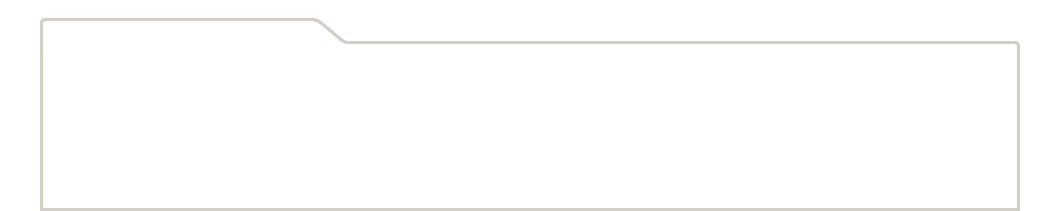
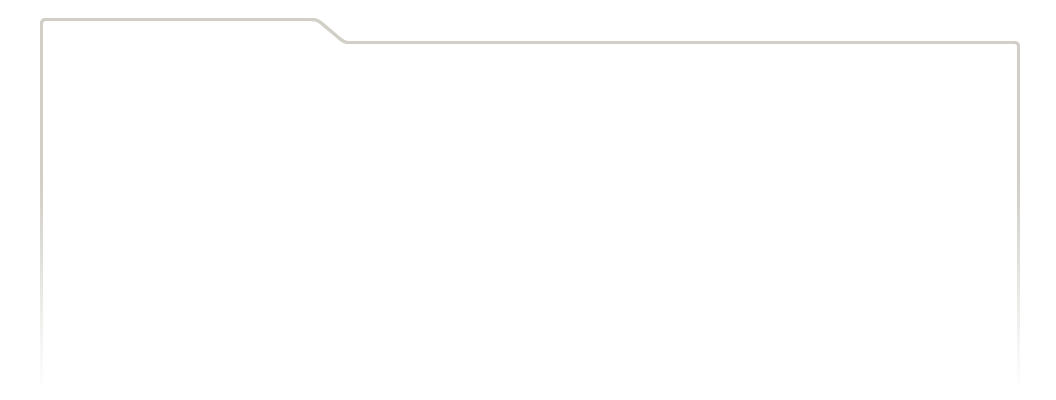
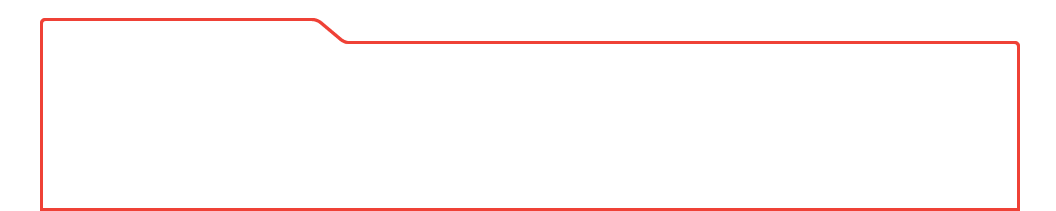
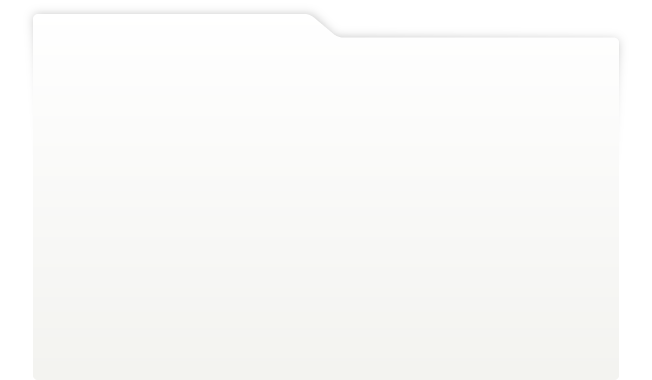
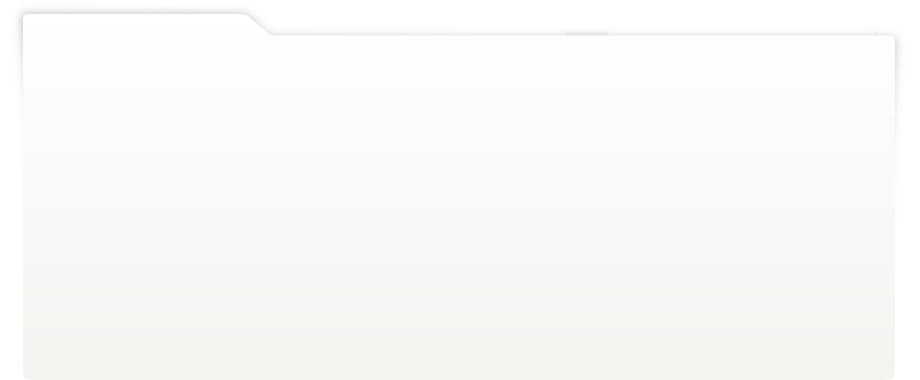
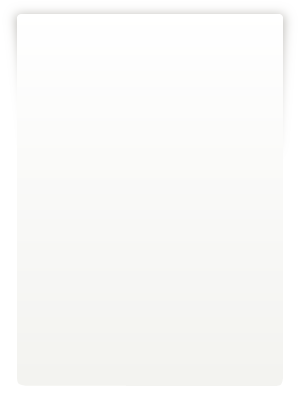
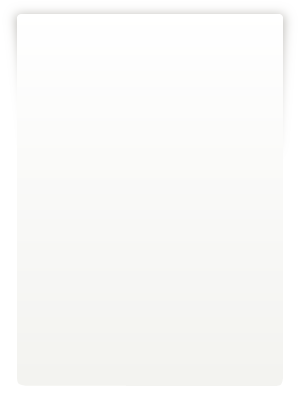
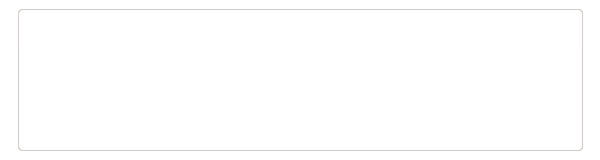
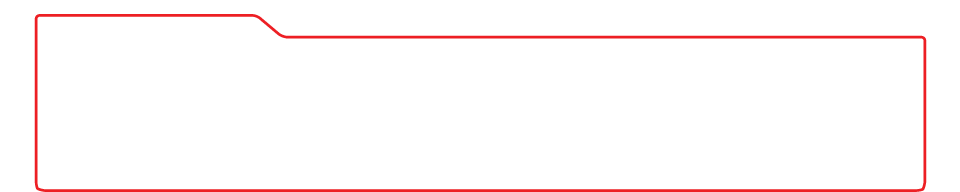
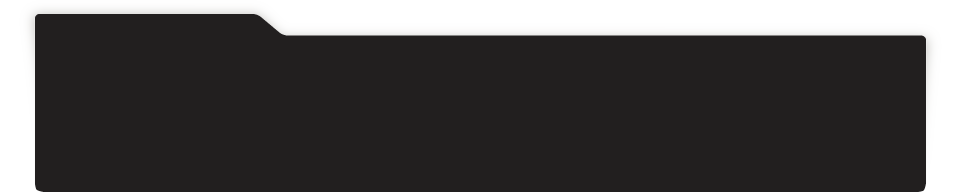
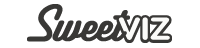
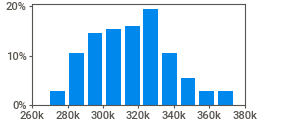
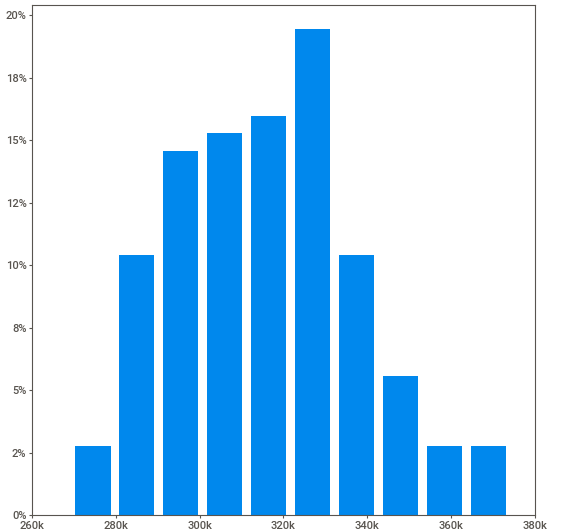
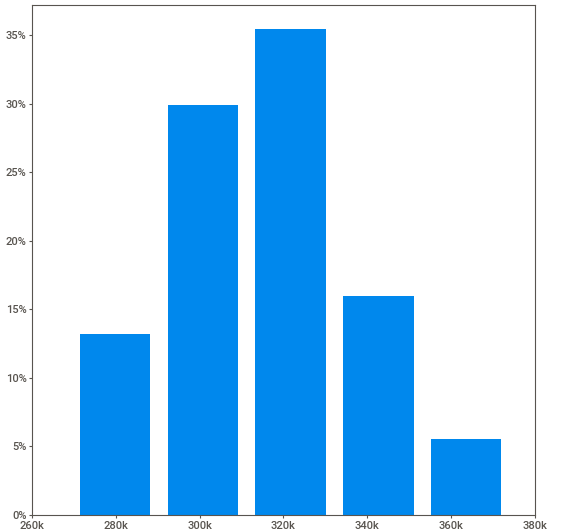
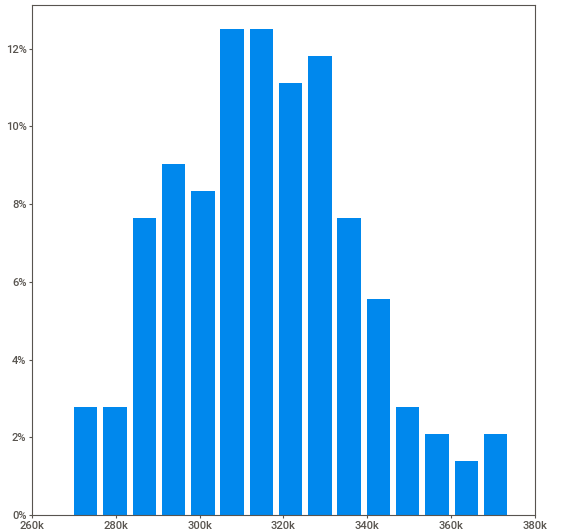
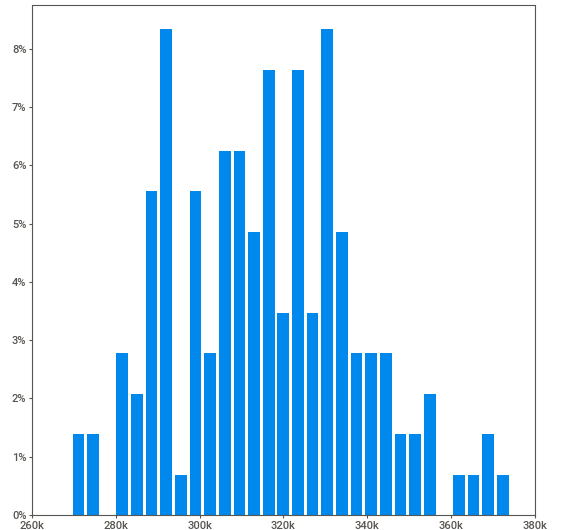
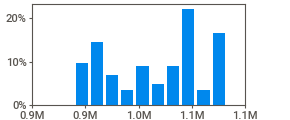
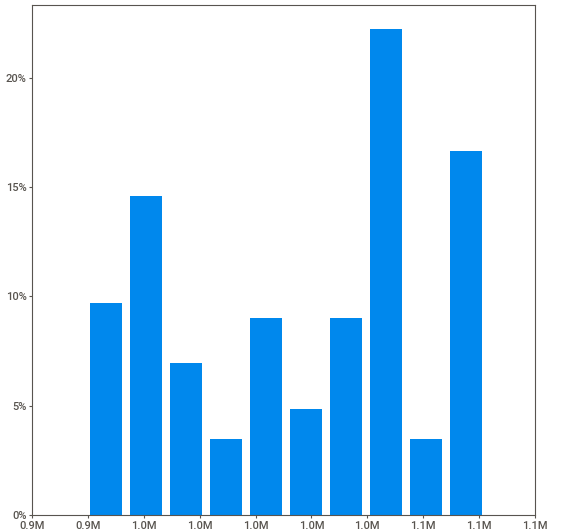
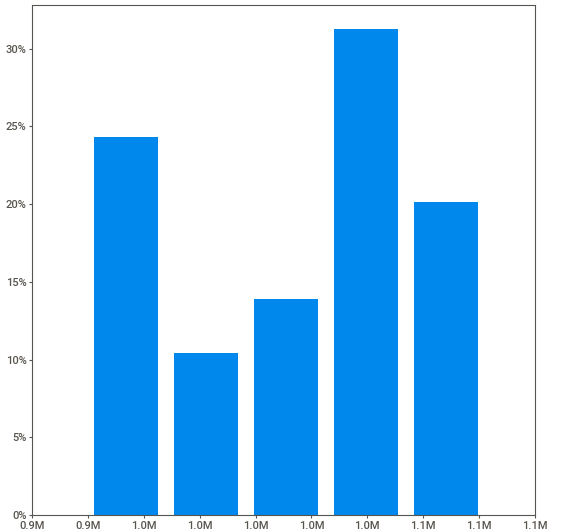
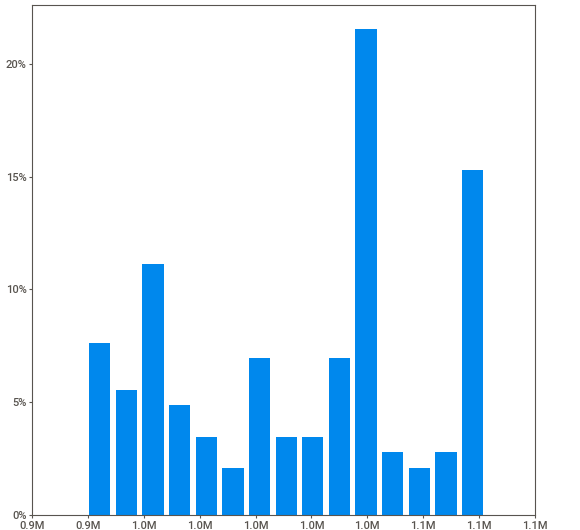
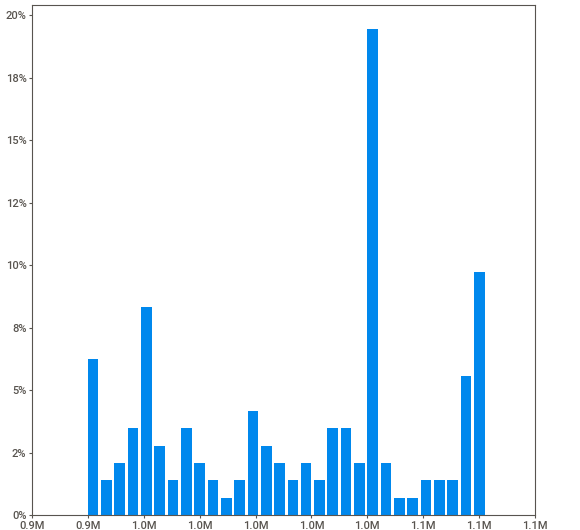
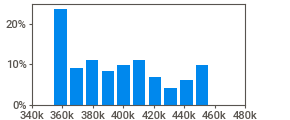
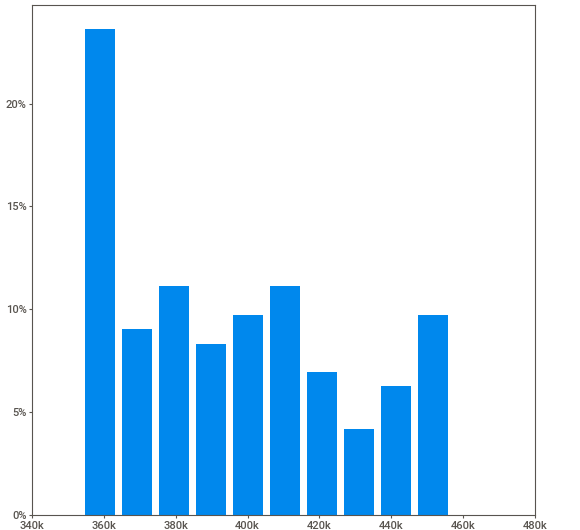
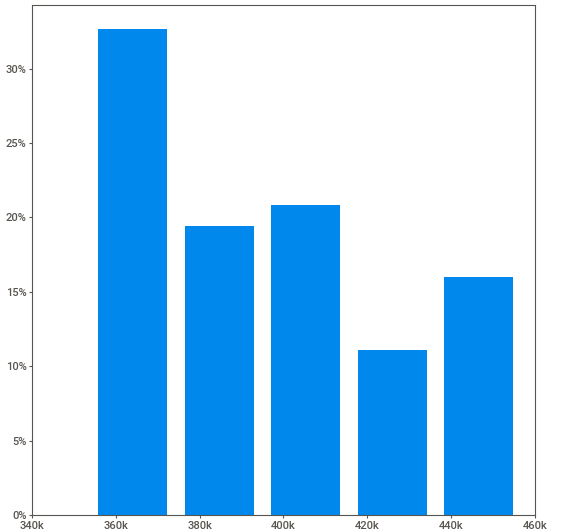
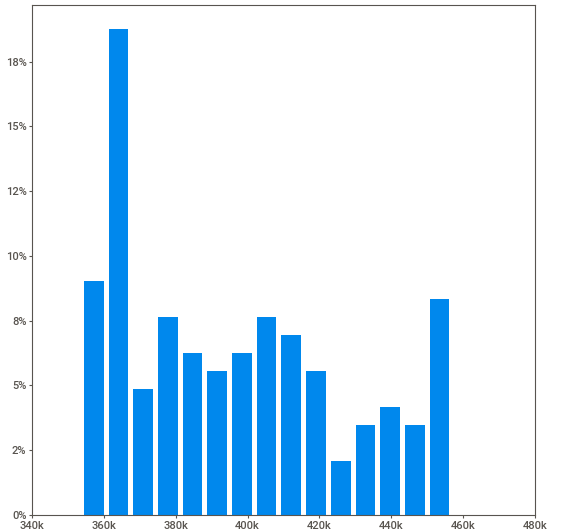
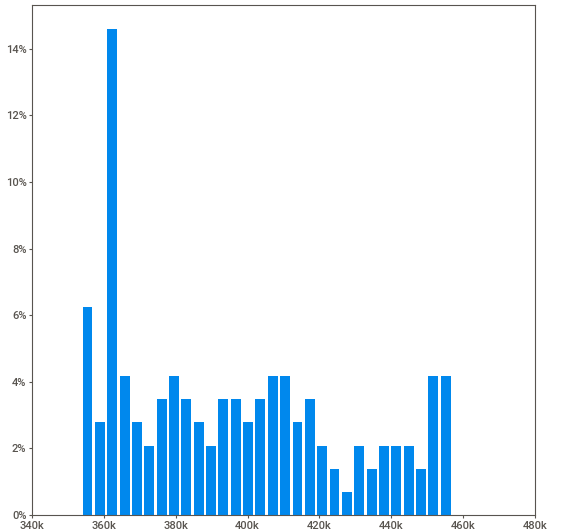
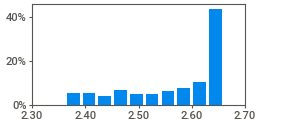
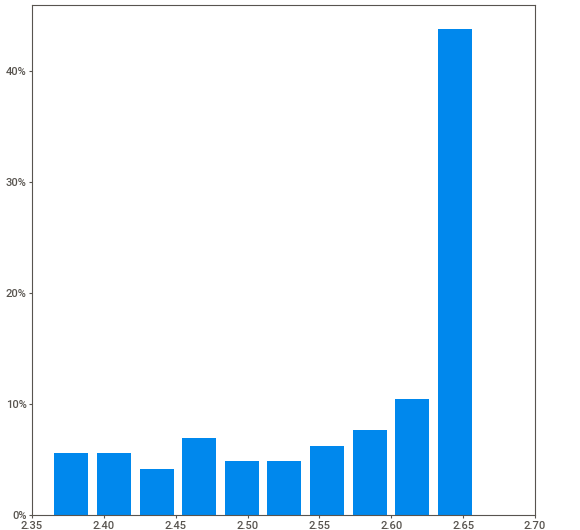
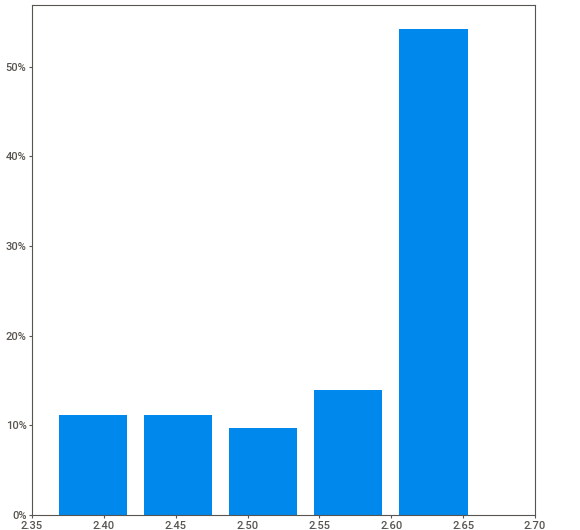
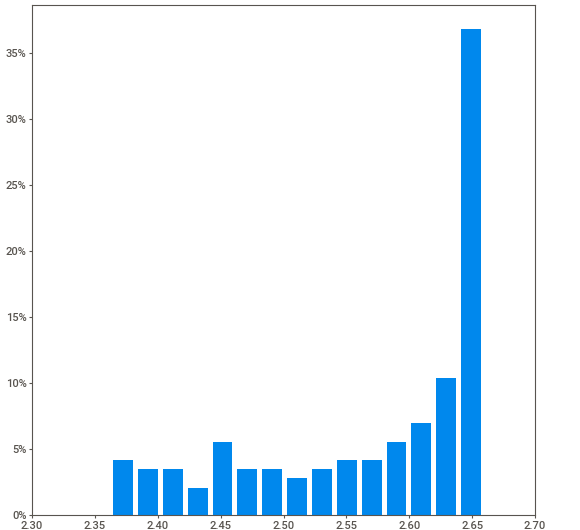
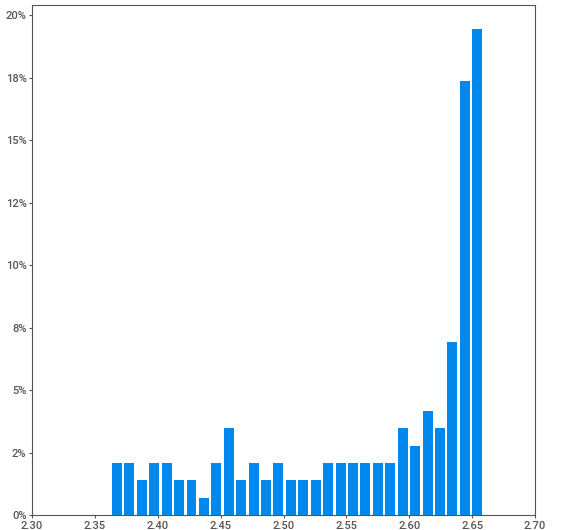
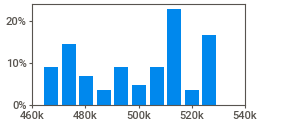
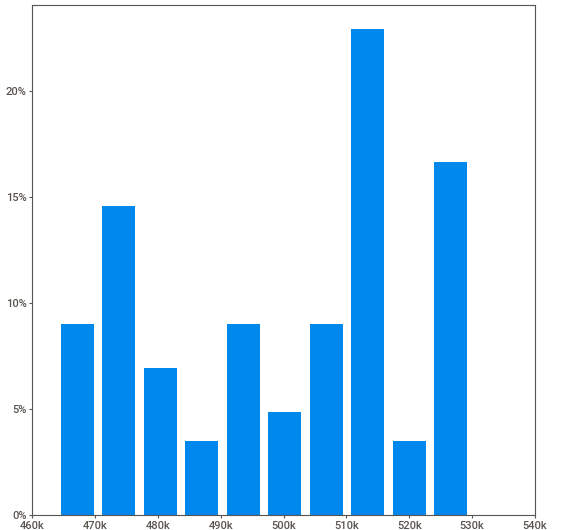
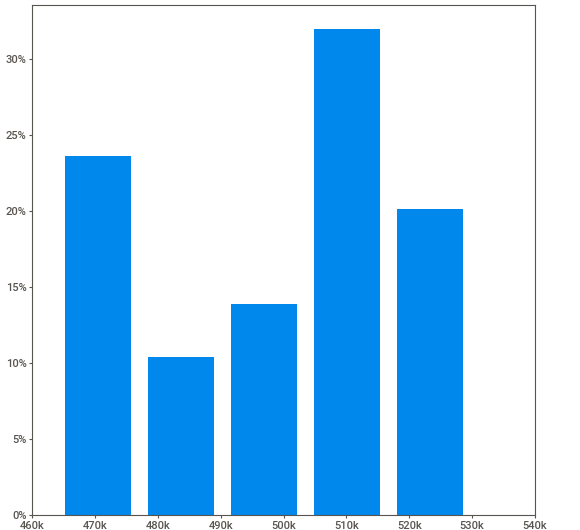
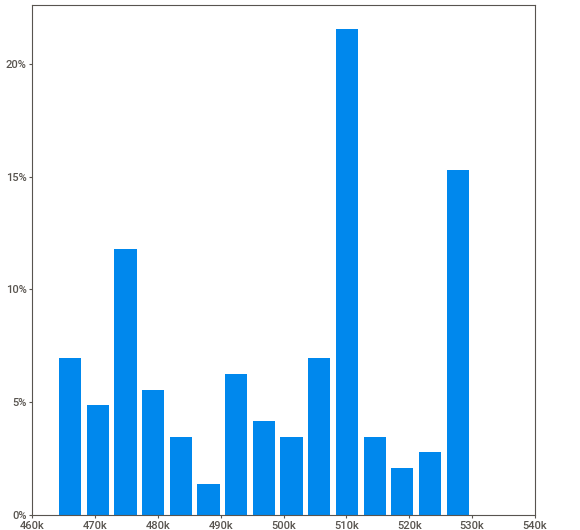
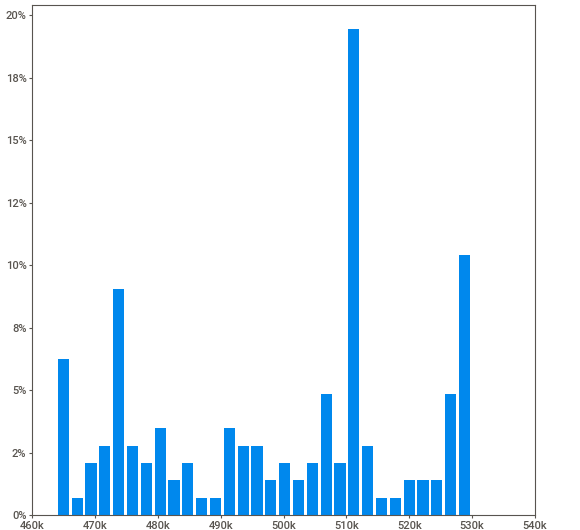
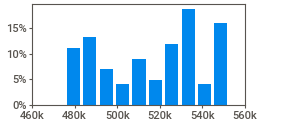
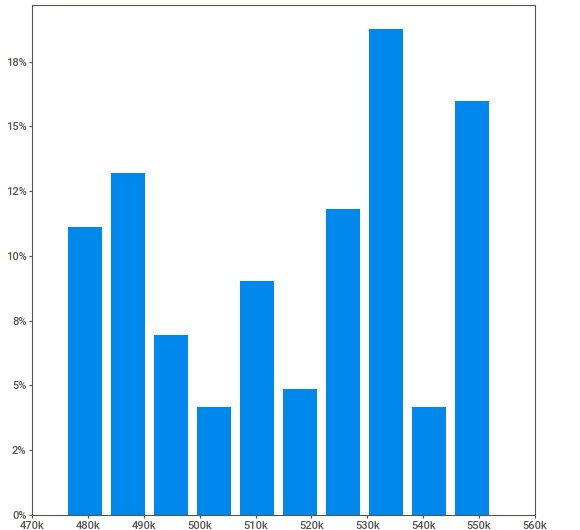
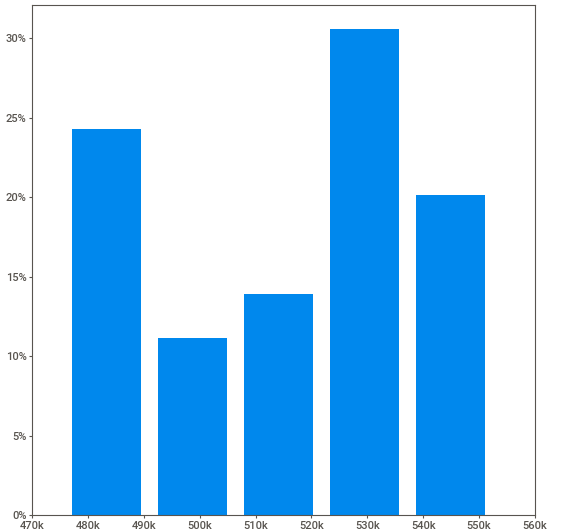
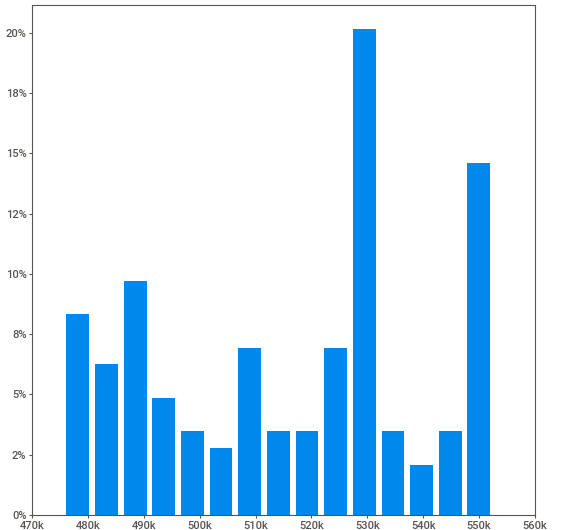
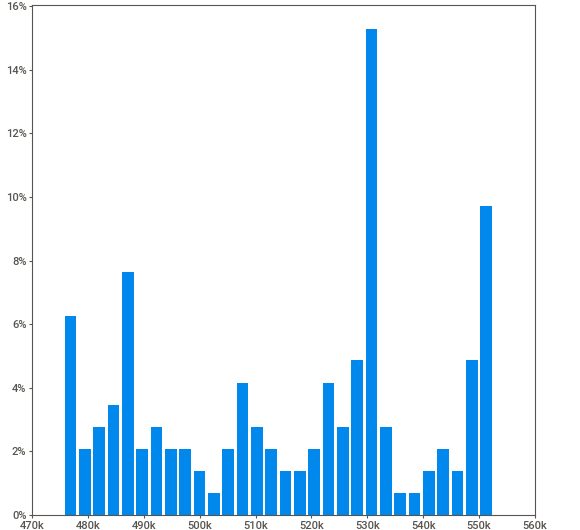
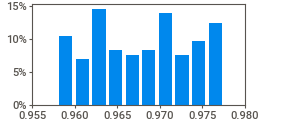
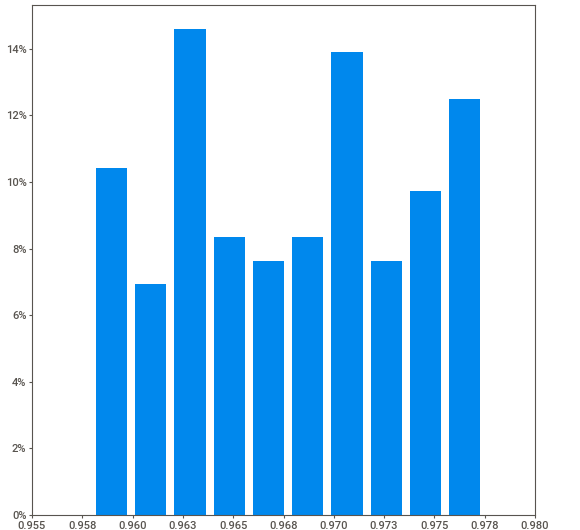
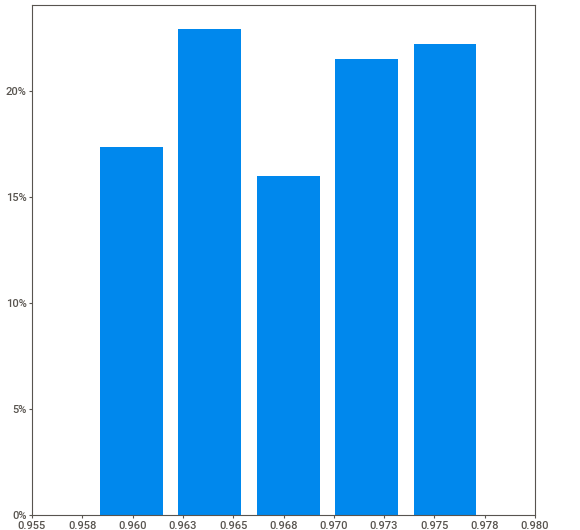
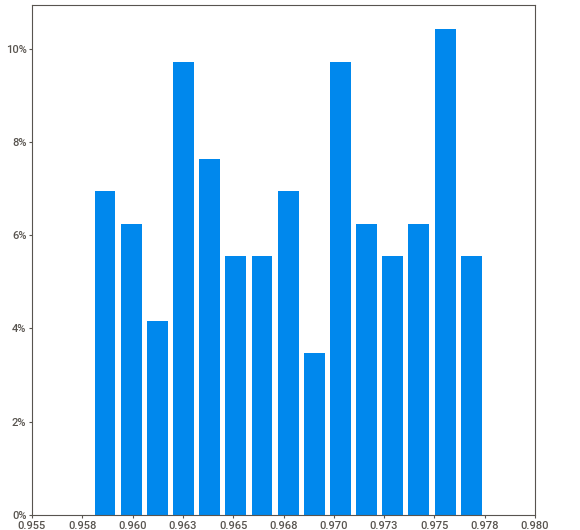
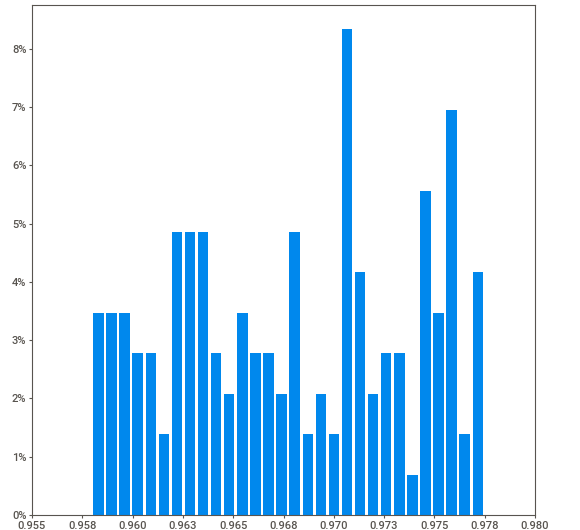
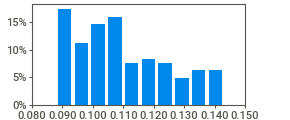
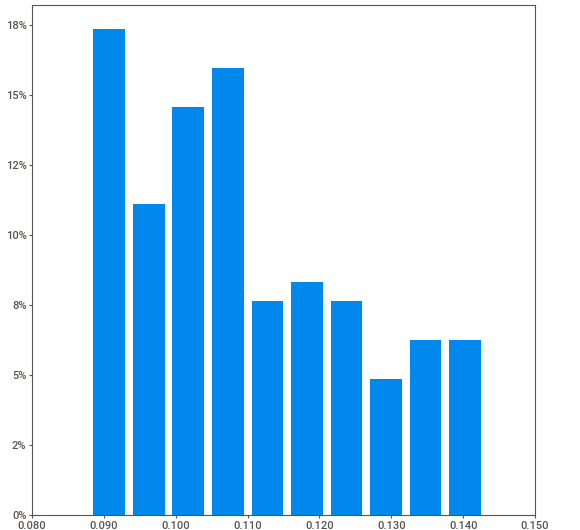
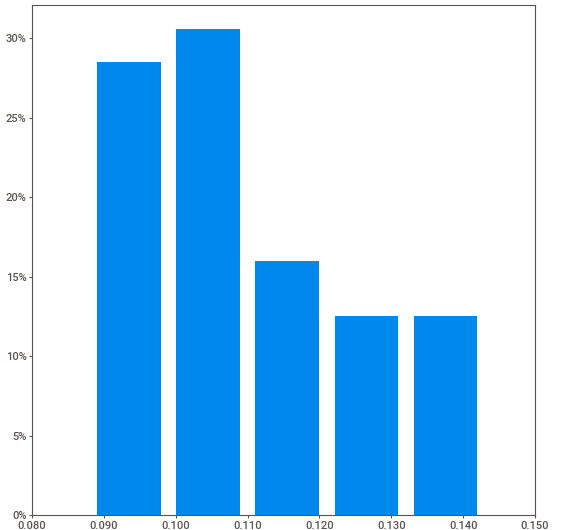
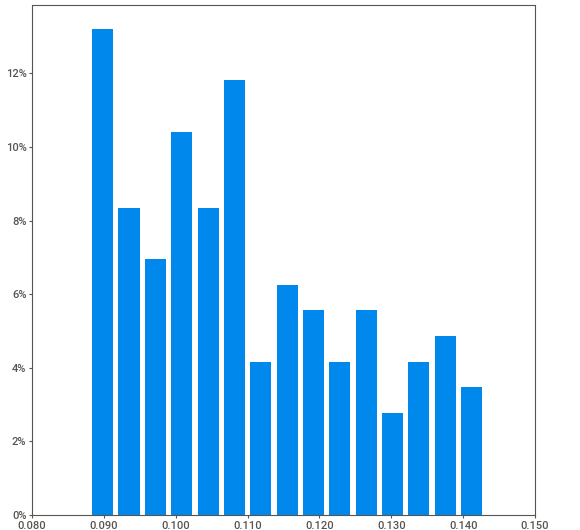
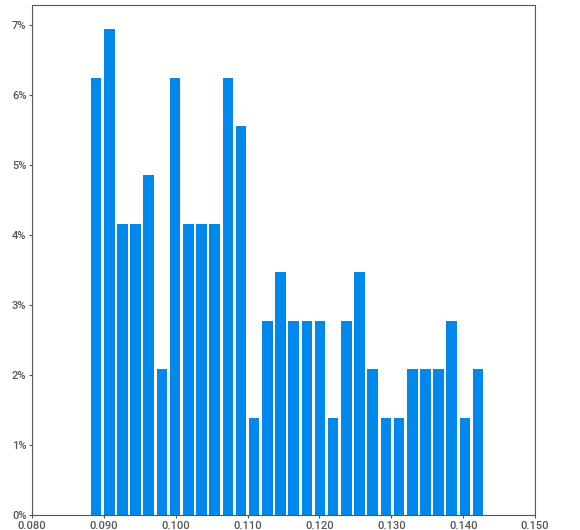
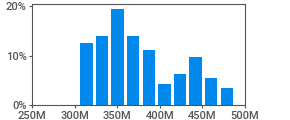
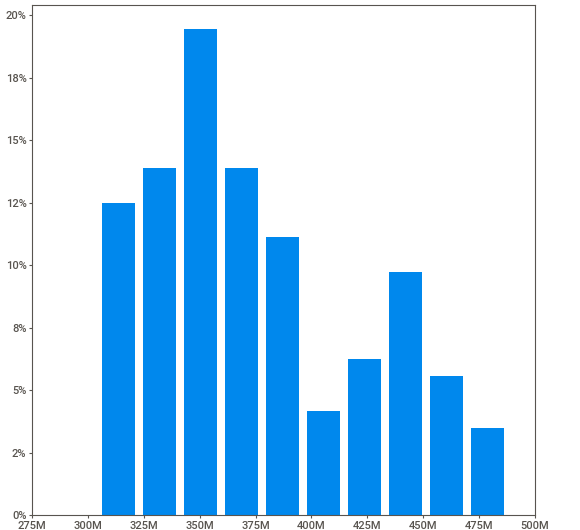
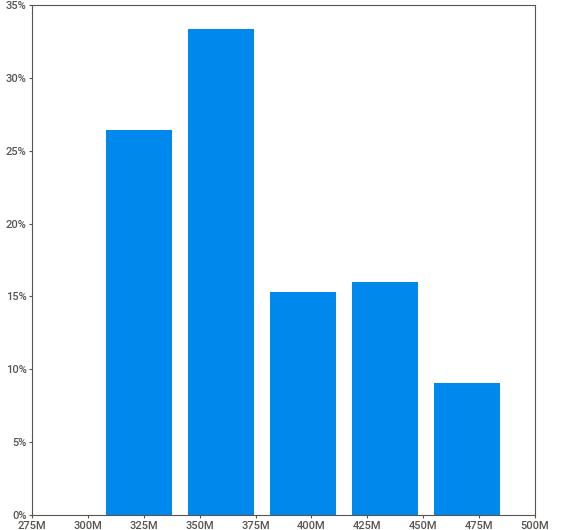
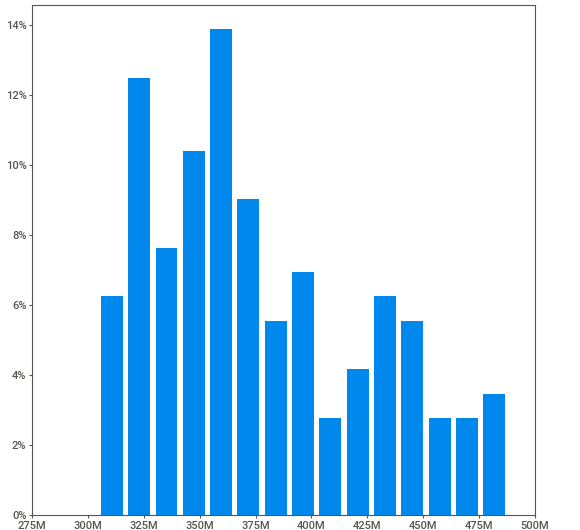
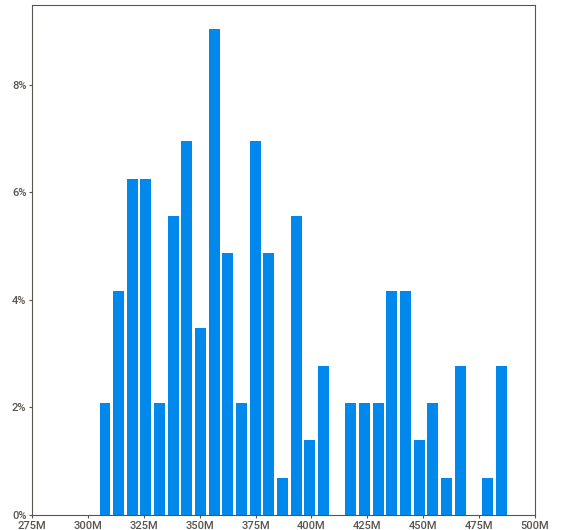
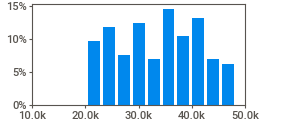
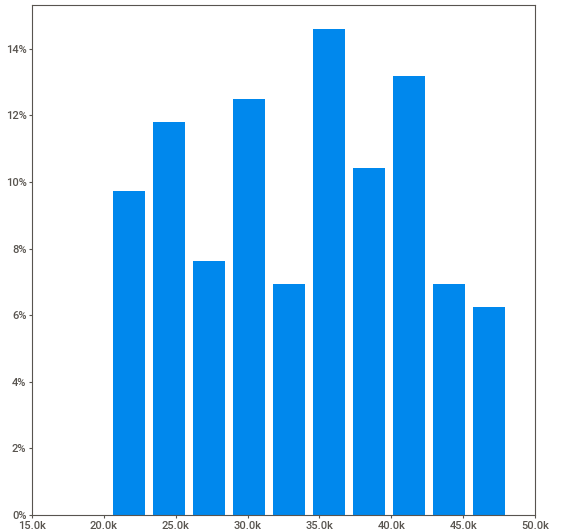
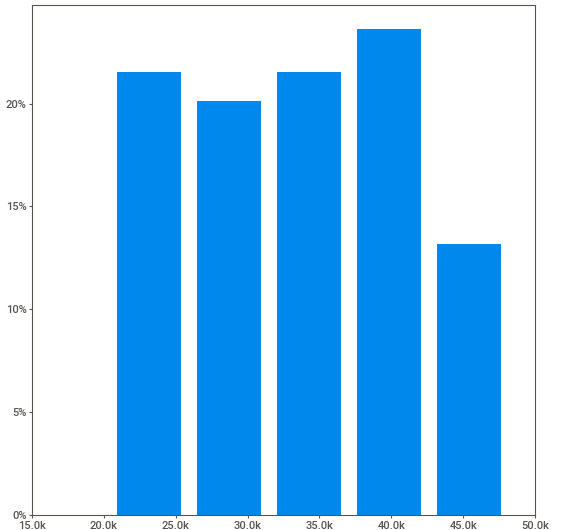
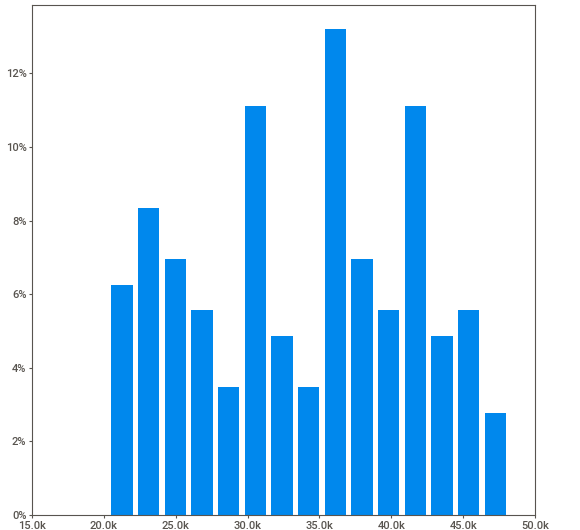
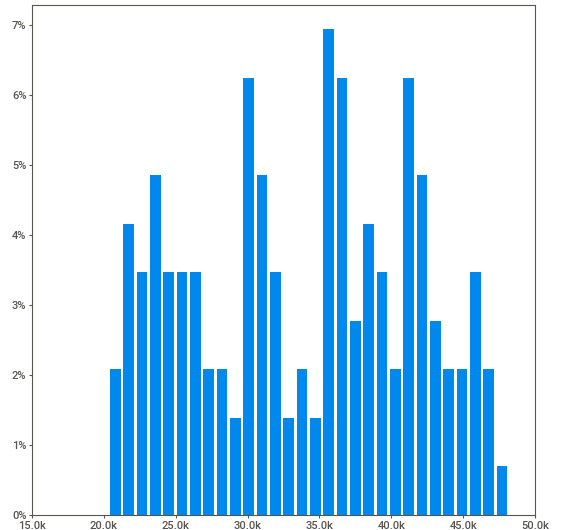
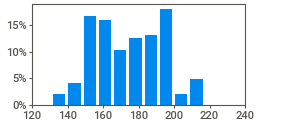
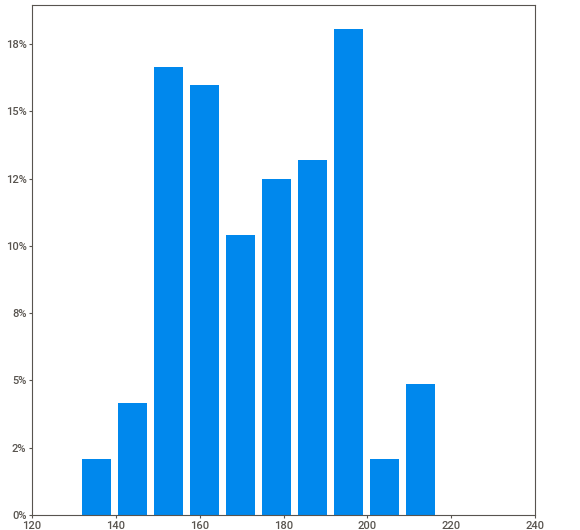
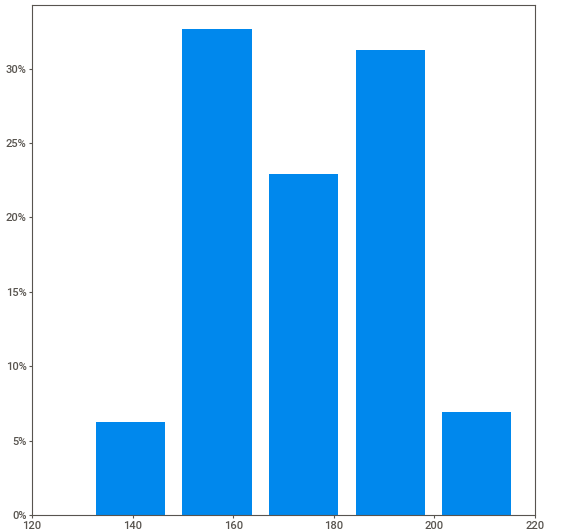
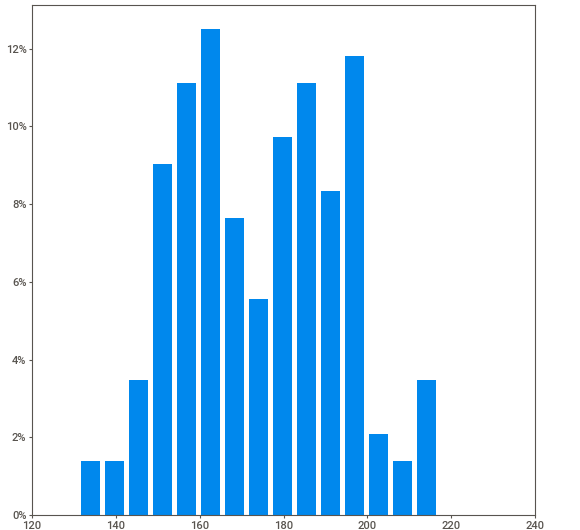
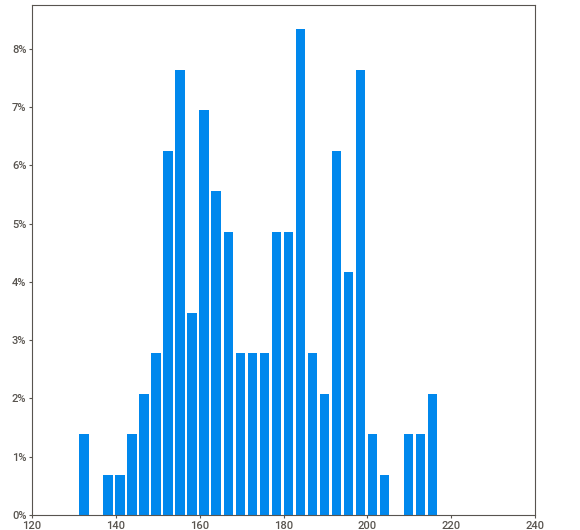
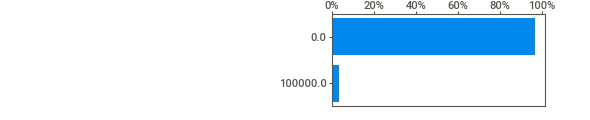
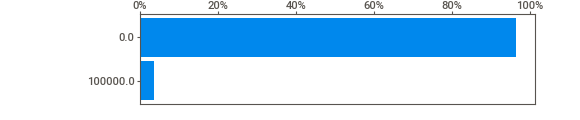
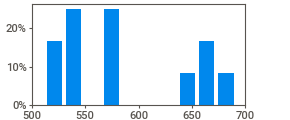
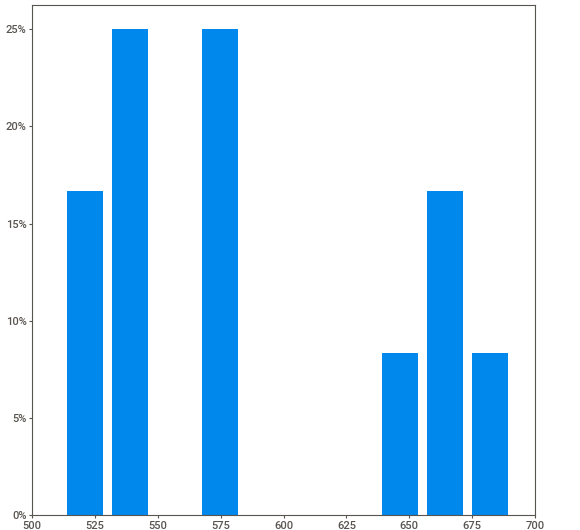
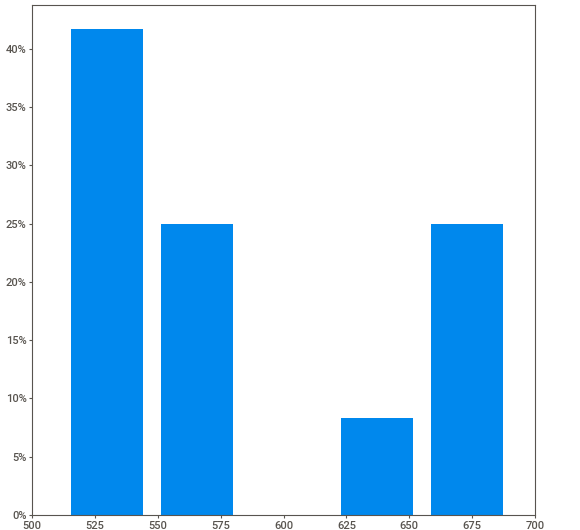
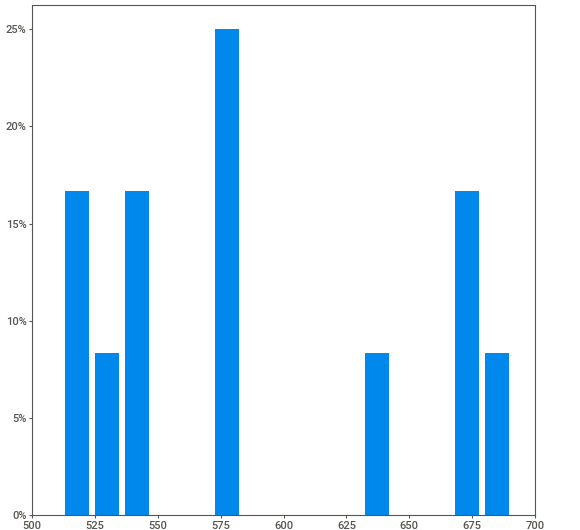
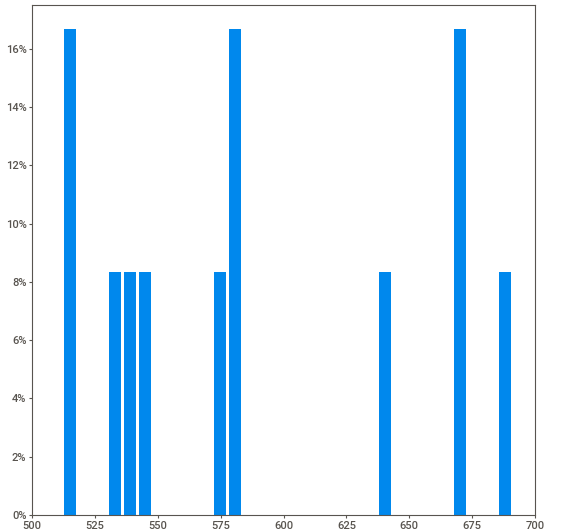
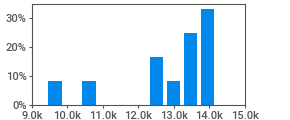
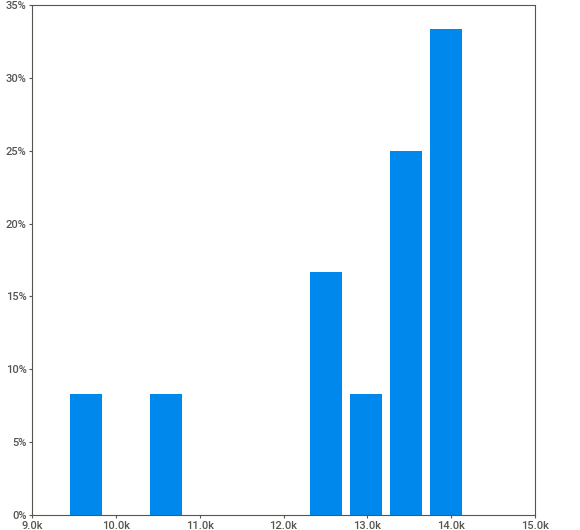
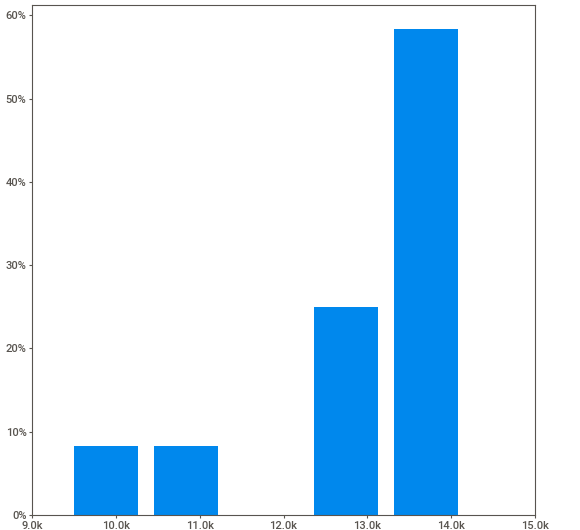
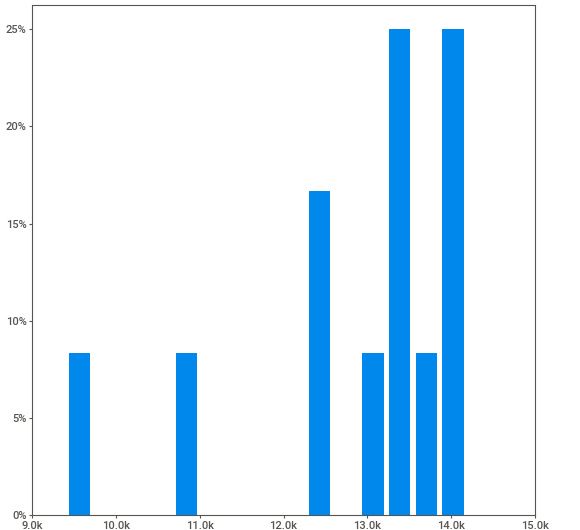
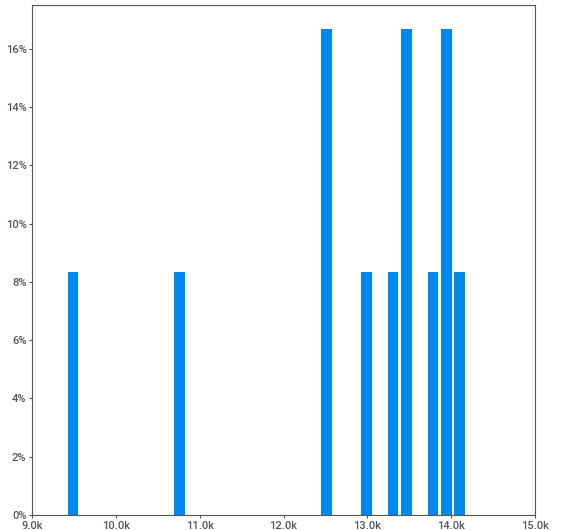
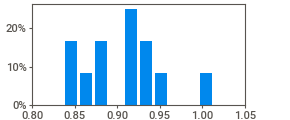
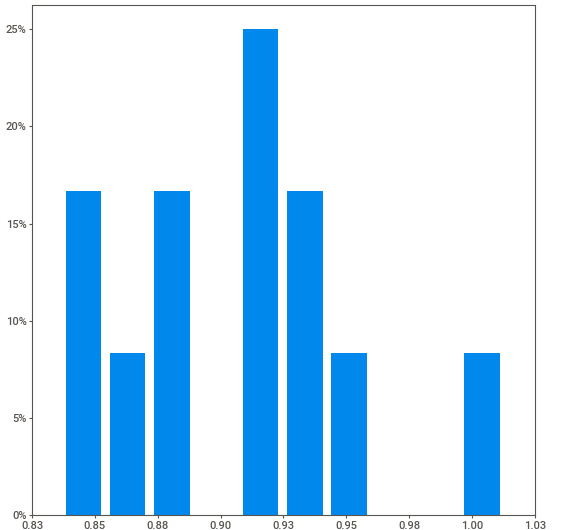
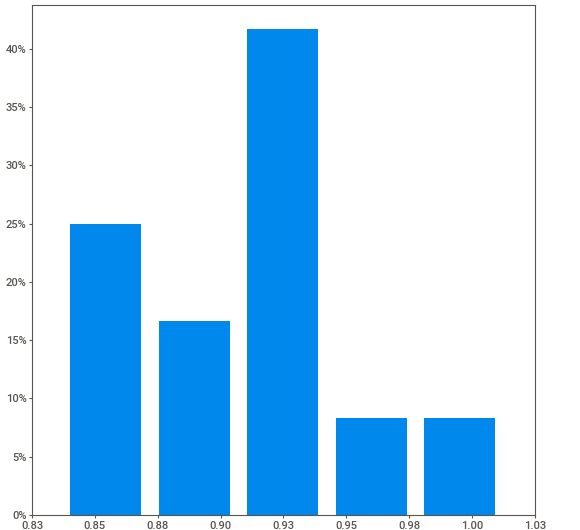
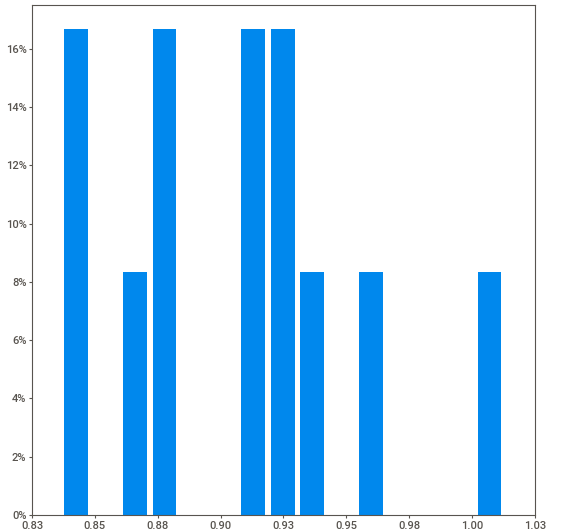
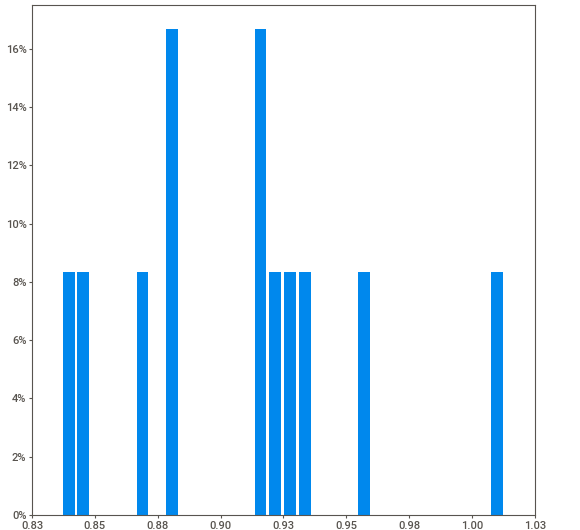
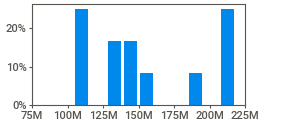
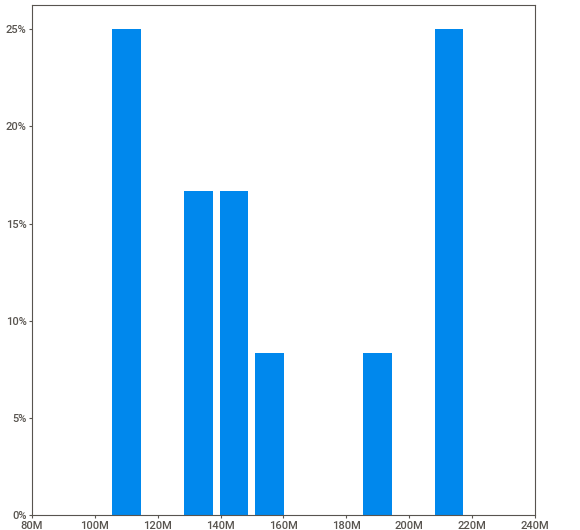
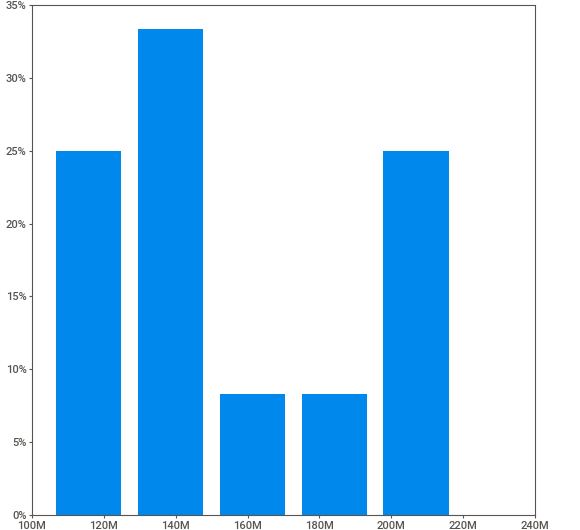
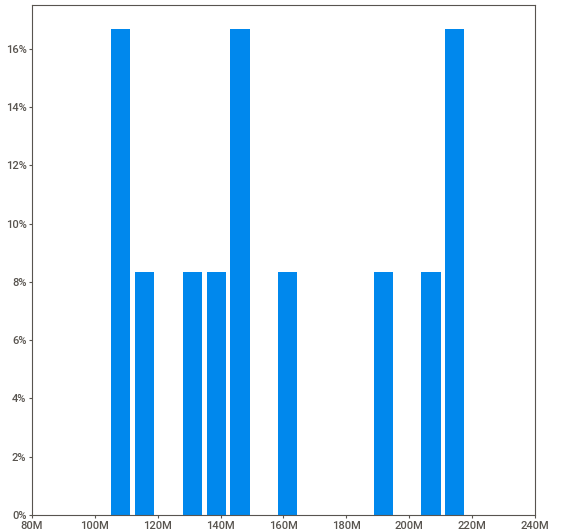
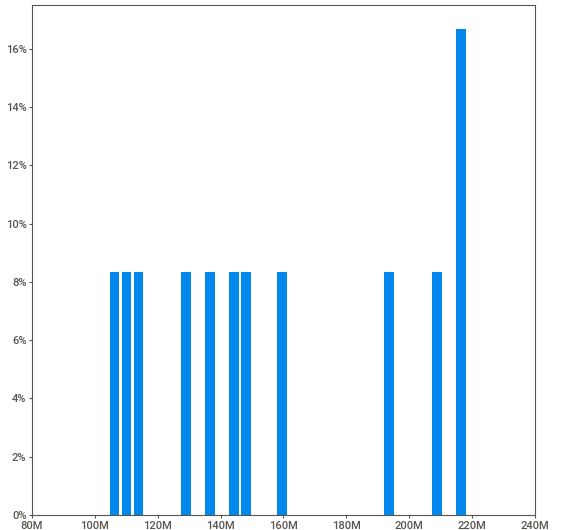
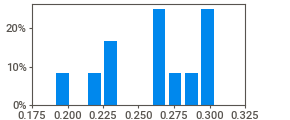
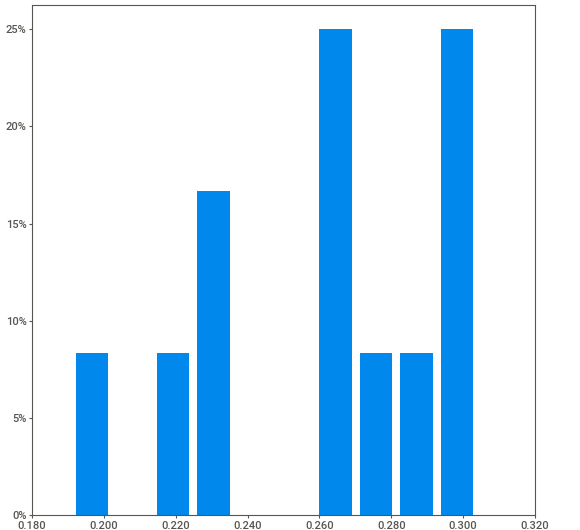
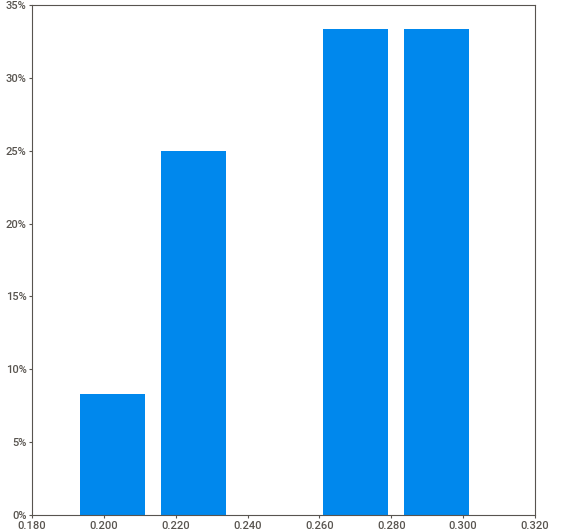
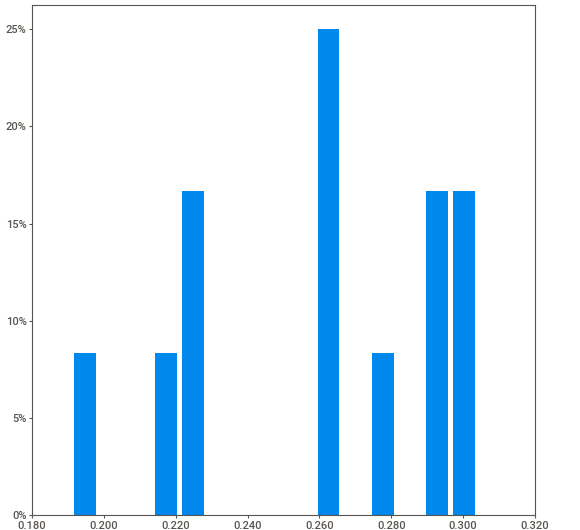
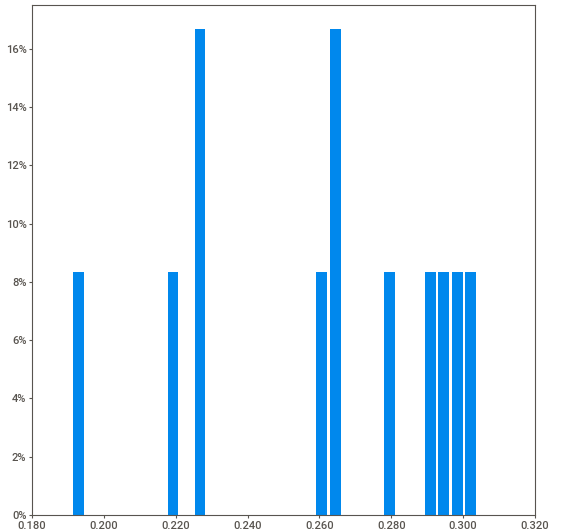
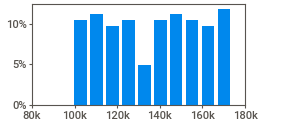
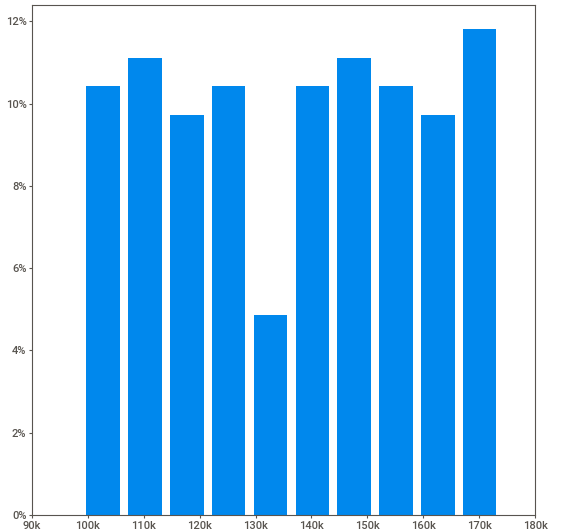
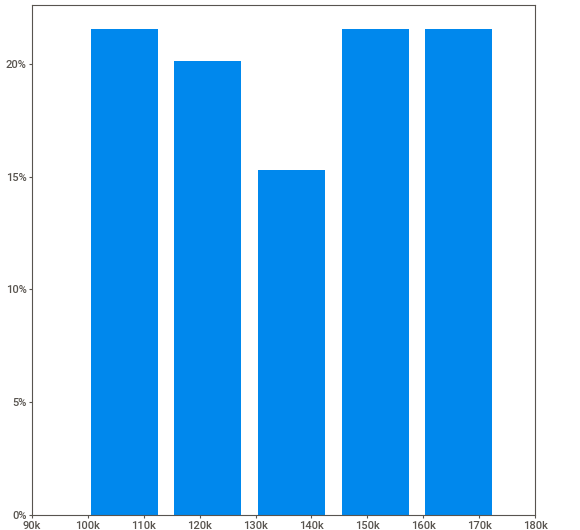
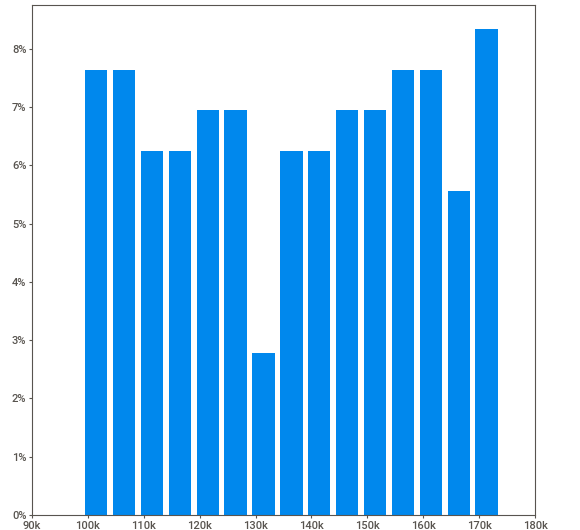
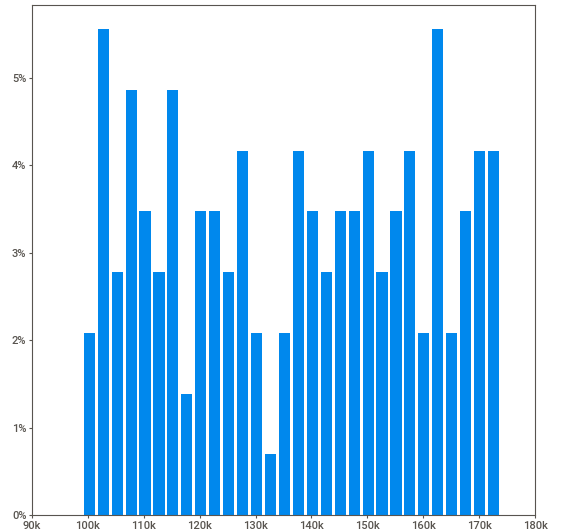
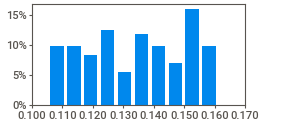
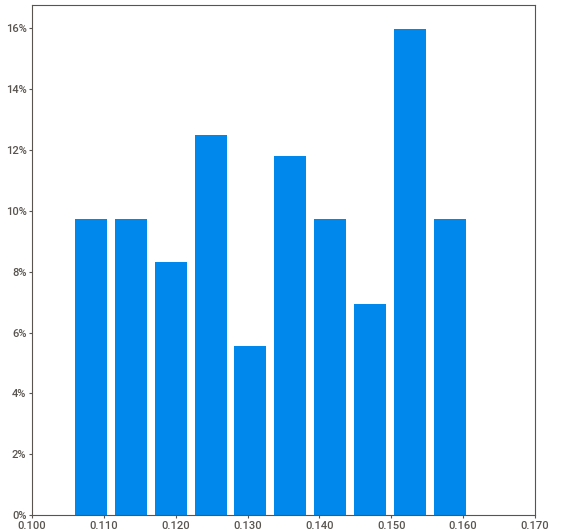
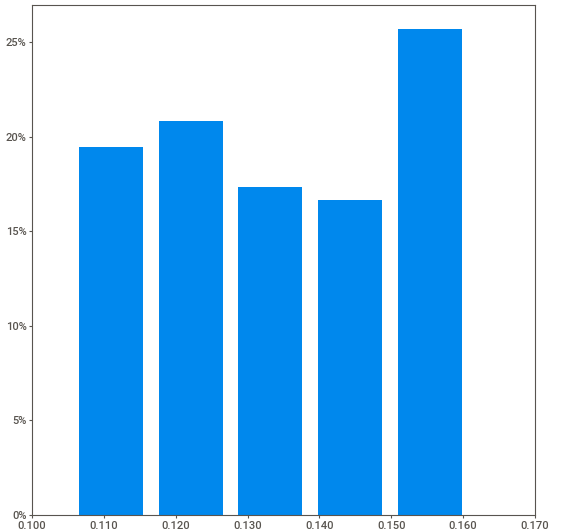
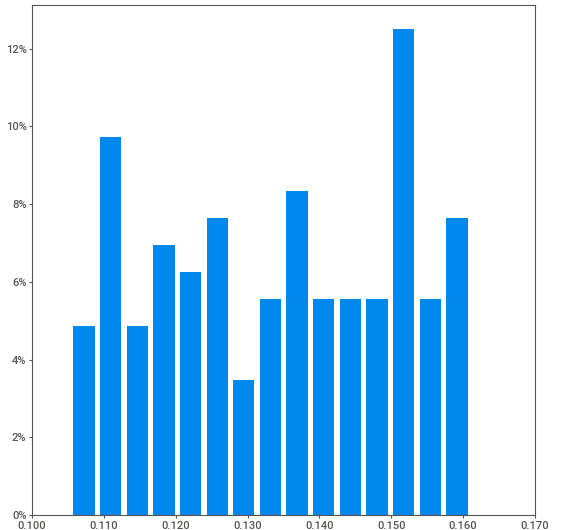
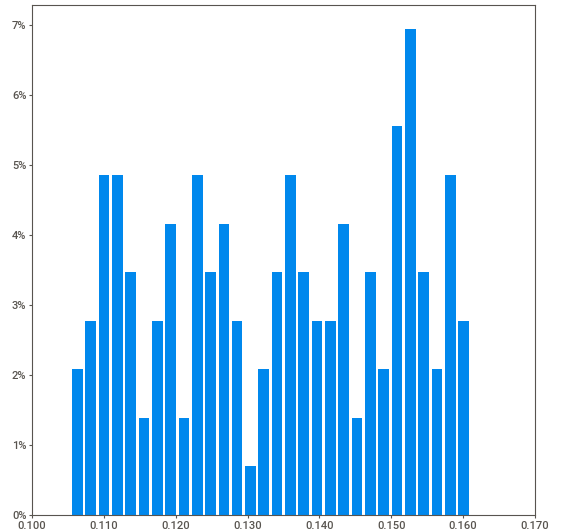
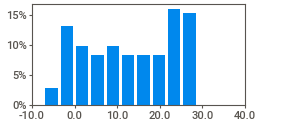
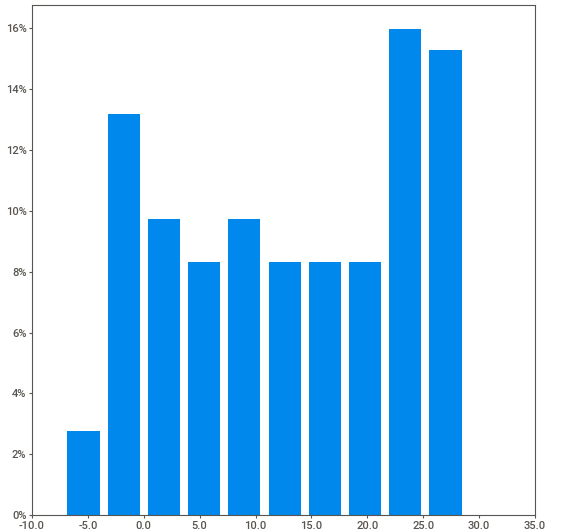
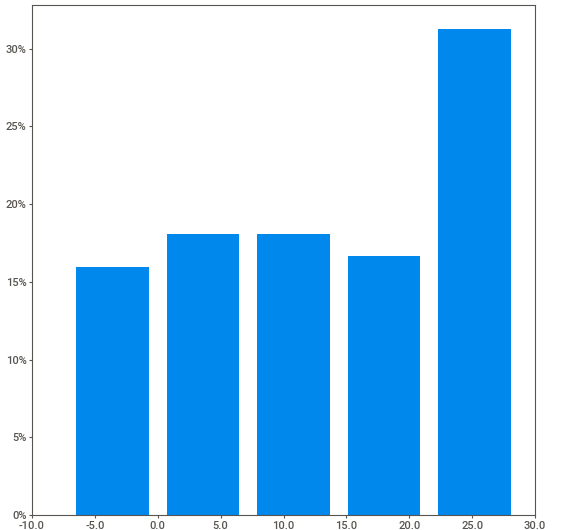
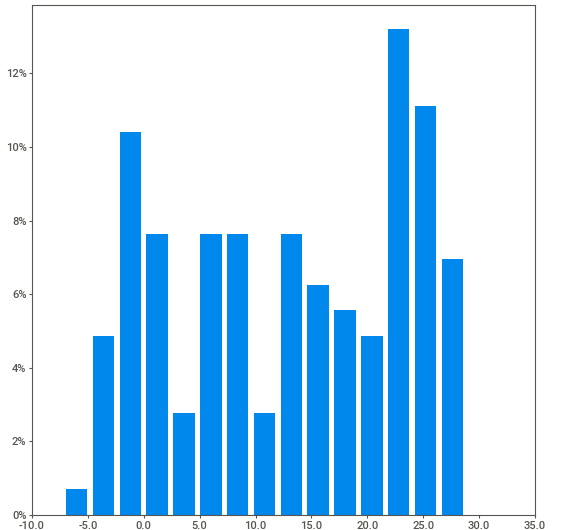
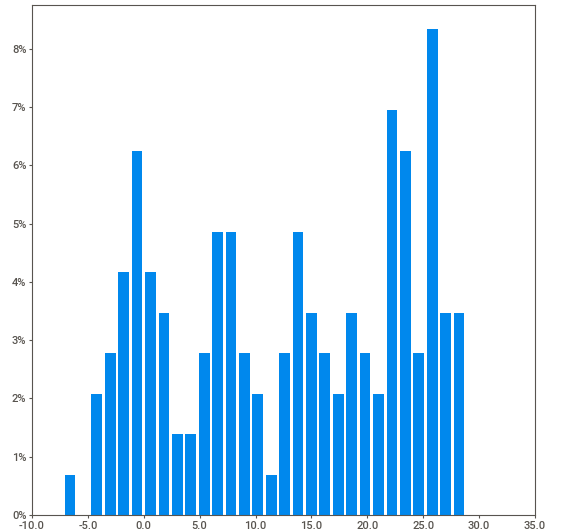
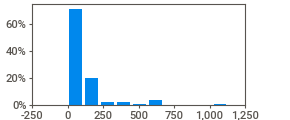
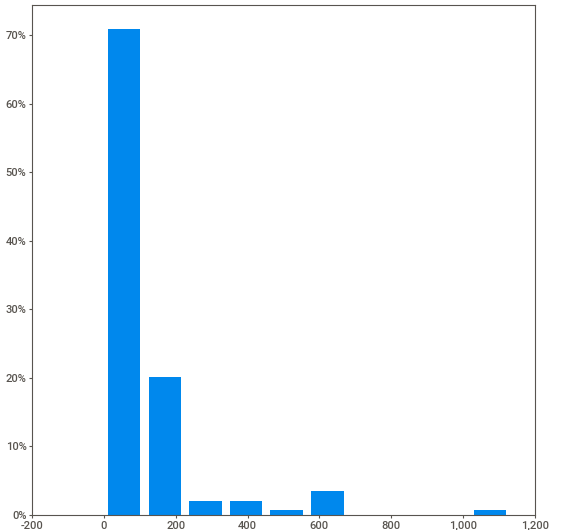
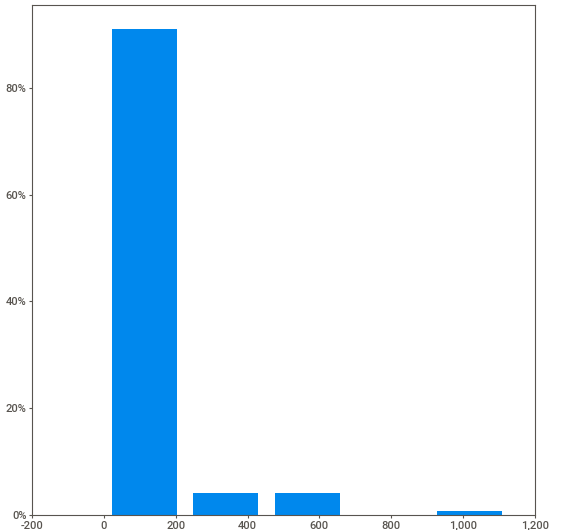
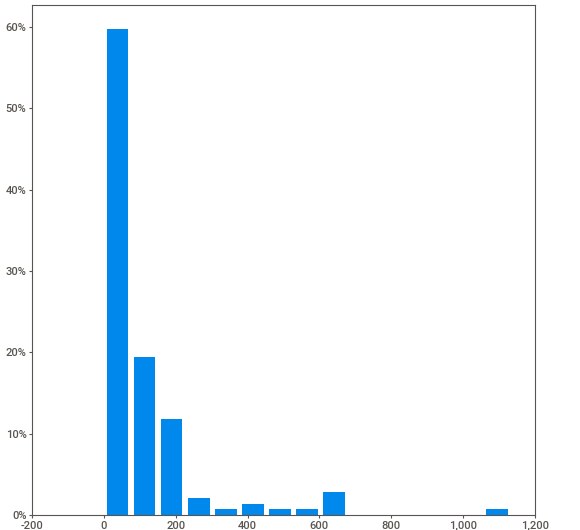
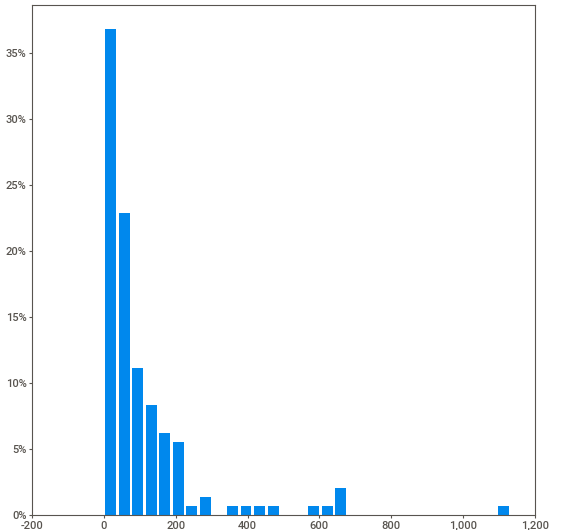
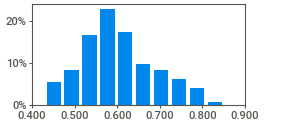
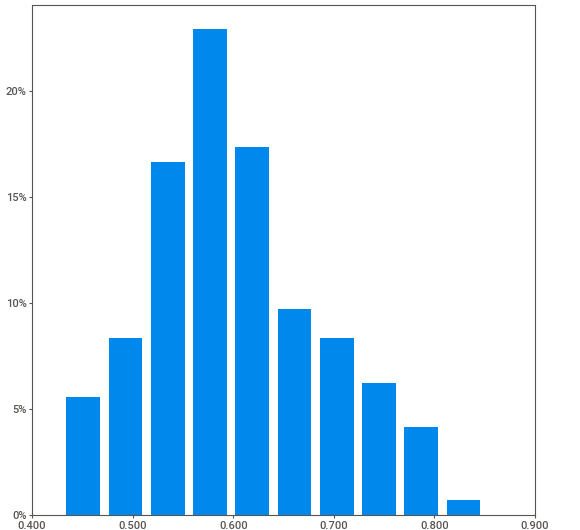
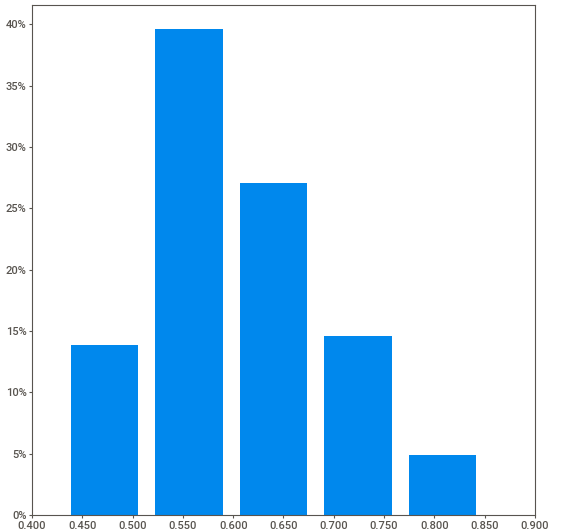
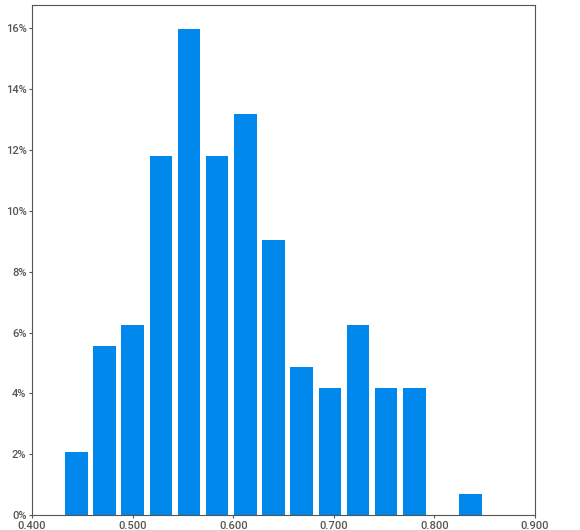
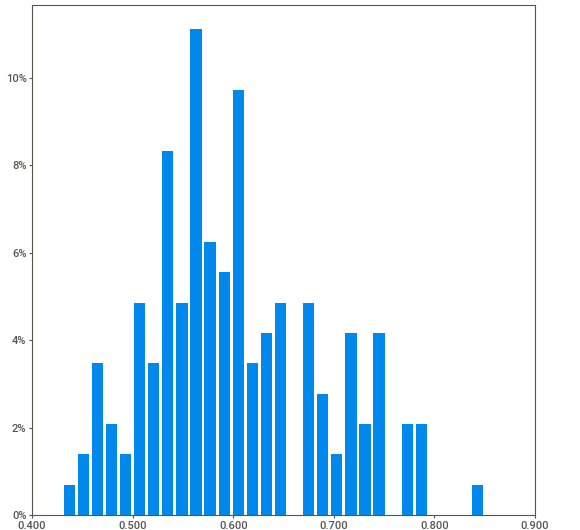
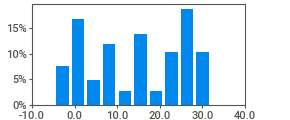
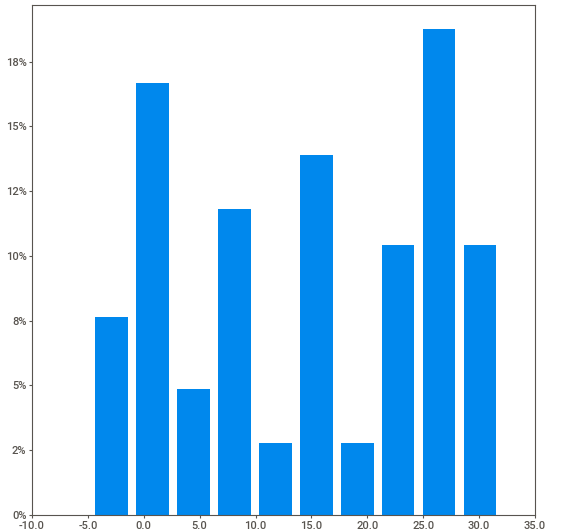
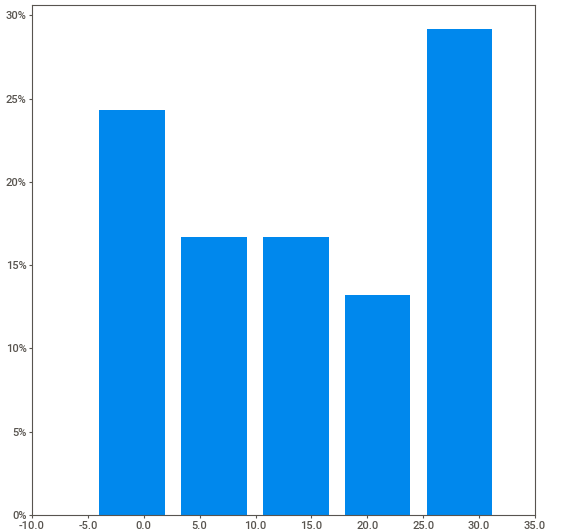
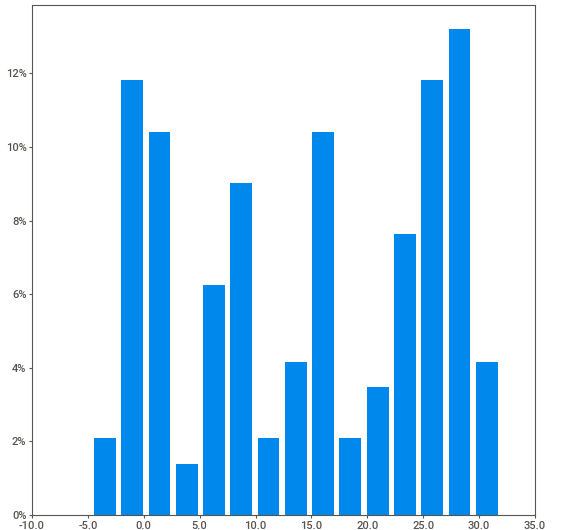
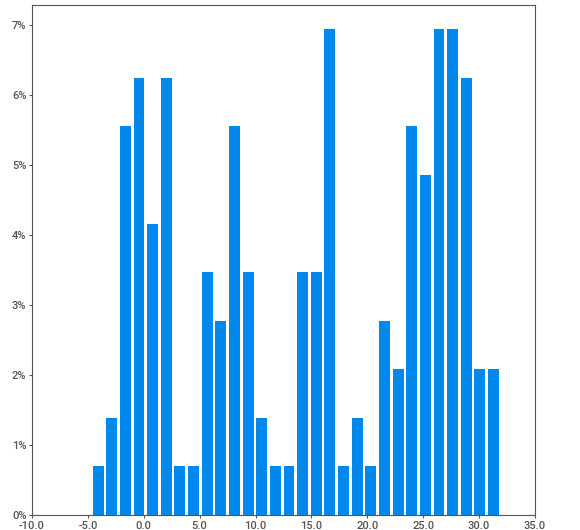
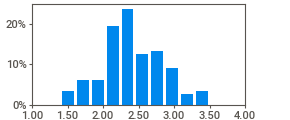
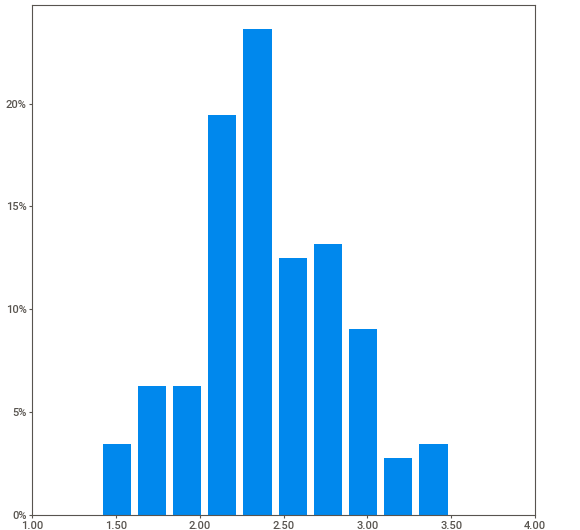
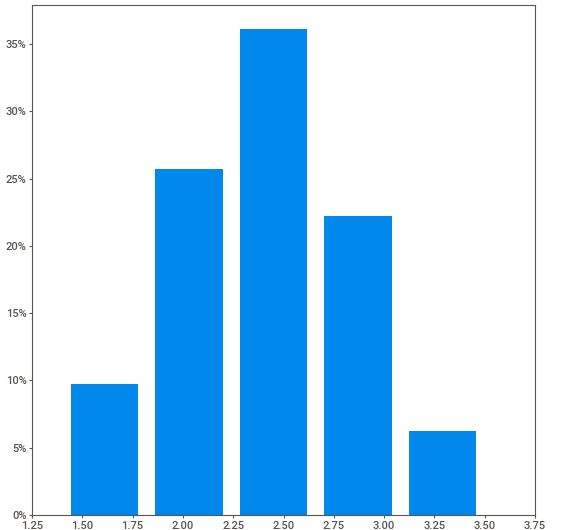
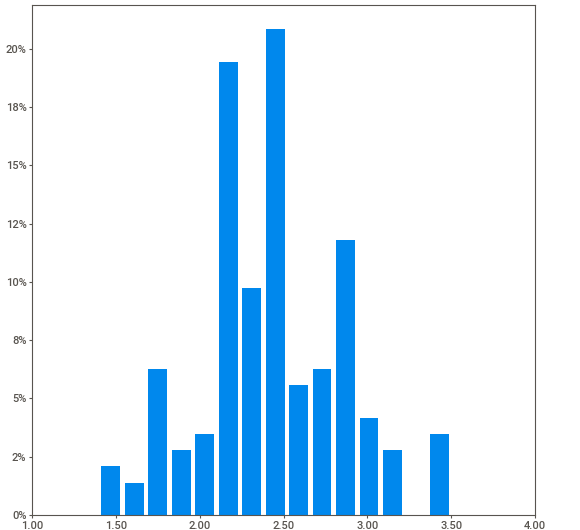
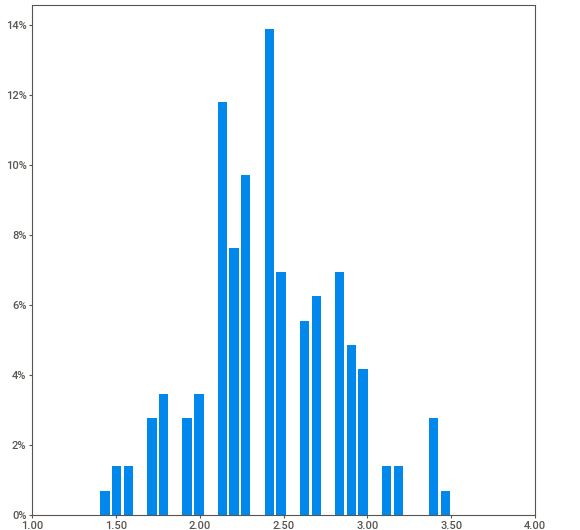
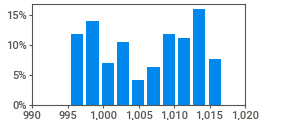
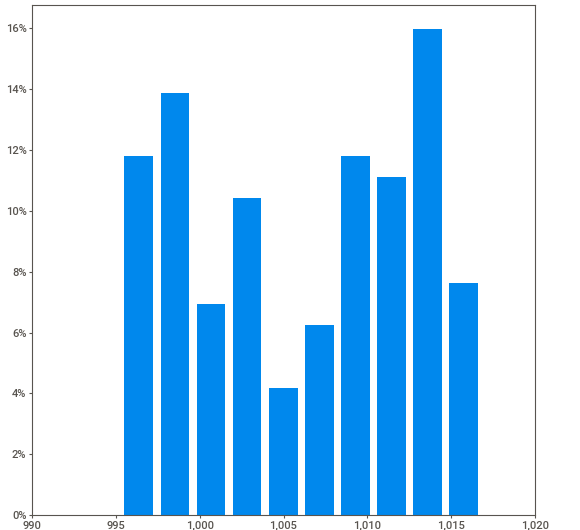
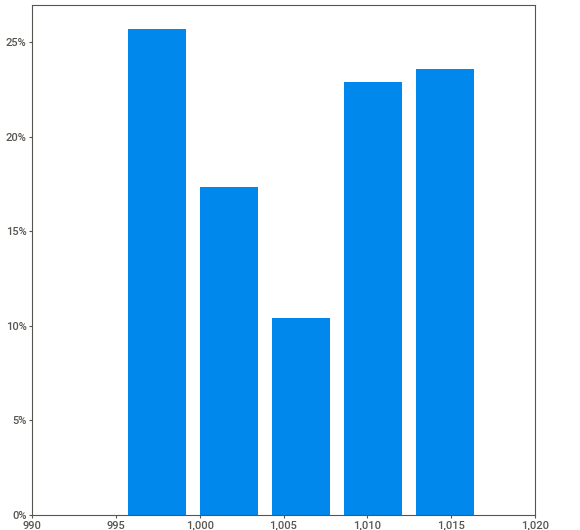
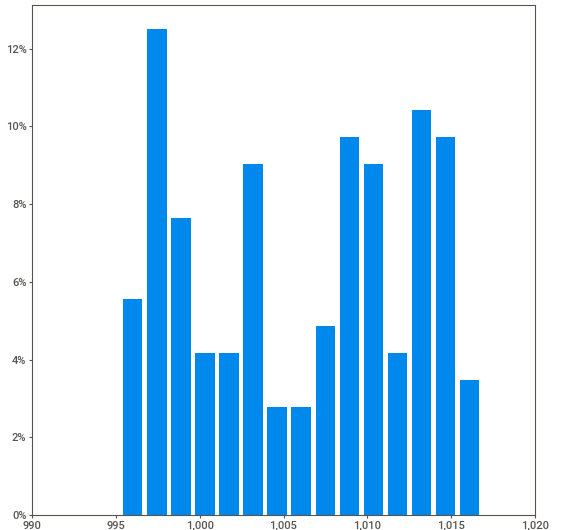
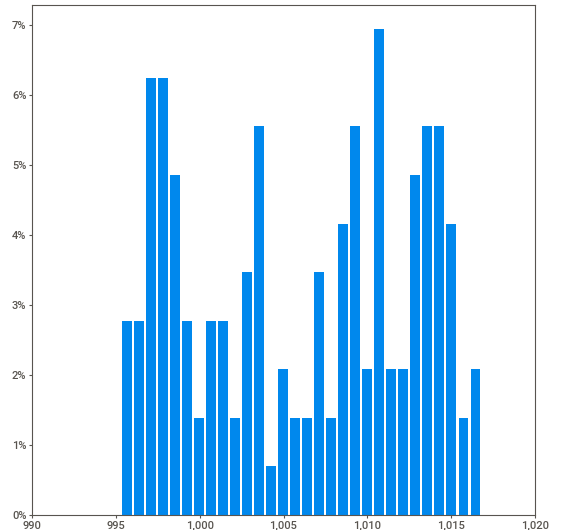
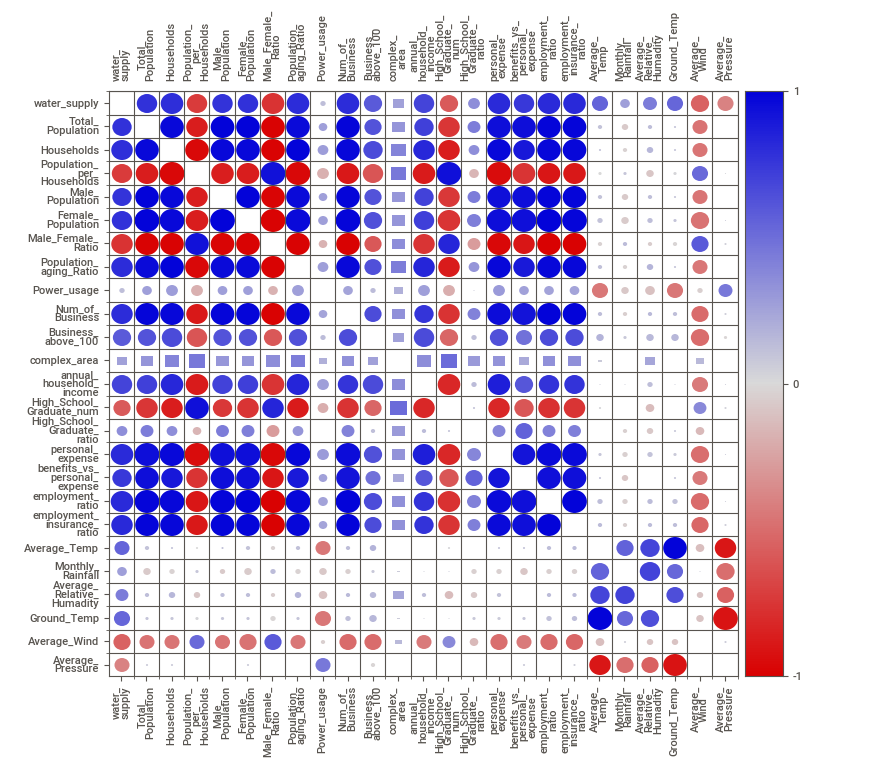
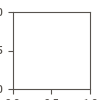

In [11]:
report.show_notebook()